| Submitted By    | Amity Lu        |
| --------------- | --------------- |
| Github Username | Amitywen        |


# Time Series Classification Part 1

In [234]:
# performing all imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import os
import re
import csv
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA

In [235]:
# Setting variables to be used globally
COLUMN_NAMES = ["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
OG_COLUMN_NAMES = ["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
STATS = ['mean', 'std', 'min', '1st_quartile', 'median', '3rd_quartile', 'max']
OR_STATS = ['min', 'max', 'mean', 'median', 'std', '1st_quartile', '3rd_quartile']
ROOT = '../homework-5-Amitywen/AReM/'
sniffer = csv.Sniffer()

### Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [236]:
# function to split data files into train and test files
def split_train_test(root):
    train = []
    test = []
    for root, dir, file in os.walk(root):
        for f in file:
            if 'pdf' not in f:                
                fpof = os.path.join(root, f)
                if 'bending1' in fpof or 'bending2' in fpof:
                    if 'dataset1.csv' in fpof or 'dataset2.csv' in fpof:
                        test.append(fpof)
                    else:
                        train.append(fpof)
                else:
                    if 'dataset1.csv' in fpof or 'dataset2.csv' in fpof or 'dataset3.csv' in fpof:
                        test.append(fpof)
                    else:
                        train.append(fpof)
    return train, test

In [237]:
train, test = split_train_test(ROOT)

In [238]:
train

['../homework-5-Amitywen/AReM/.DS_Store',
 '../homework-5-Amitywen/AReM/bending1/dataset7.csv',
 '../homework-5-Amitywen/AReM/bending1/dataset6.csv',
 '../homework-5-Amitywen/AReM/bending1/dataset4.csv',
 '../homework-5-Amitywen/AReM/bending1/dataset5.csv',
 '../homework-5-Amitywen/AReM/bending1/dataset3.csv',
 '../homework-5-Amitywen/AReM/walking/dataset7.csv',
 '../homework-5-Amitywen/AReM/walking/dataset6.csv',
 '../homework-5-Amitywen/AReM/walking/dataset4.csv',
 '../homework-5-Amitywen/AReM/walking/dataset5.csv',
 '../homework-5-Amitywen/AReM/walking/dataset10.csv',
 '../homework-5-Amitywen/AReM/walking/dataset11.csv',
 '../homework-5-Amitywen/AReM/walking/dataset13.csv',
 '../homework-5-Amitywen/AReM/walking/dataset12.csv',
 '../homework-5-Amitywen/AReM/walking/dataset15.csv',
 '../homework-5-Amitywen/AReM/walking/dataset14.csv',
 '../homework-5-Amitywen/AReM/walking/dataset8.csv',
 '../homework-5-Amitywen/AReM/walking/dataset9.csv',
 '../homework-5-Amitywen/AReM/bending2/dataset

In [239]:
indexes = [0,21]
train = np.delete(train, indexes)
train

array(['../homework-5-Amitywen/AReM/bending1/dataset7.csv',
       '../homework-5-Amitywen/AReM/bending1/dataset6.csv',
       '../homework-5-Amitywen/AReM/bending1/dataset4.csv',
       '../homework-5-Amitywen/AReM/bending1/dataset5.csv',
       '../homework-5-Amitywen/AReM/bending1/dataset3.csv',
       '../homework-5-Amitywen/AReM/walking/dataset7.csv',
       '../homework-5-Amitywen/AReM/walking/dataset6.csv',
       '../homework-5-Amitywen/AReM/walking/dataset4.csv',
       '../homework-5-Amitywen/AReM/walking/dataset5.csv',
       '../homework-5-Amitywen/AReM/walking/dataset10.csv',
       '../homework-5-Amitywen/AReM/walking/dataset11.csv',
       '../homework-5-Amitywen/AReM/walking/dataset13.csv',
       '../homework-5-Amitywen/AReM/walking/dataset12.csv',
       '../homework-5-Amitywen/AReM/walking/dataset15.csv',
       '../homework-5-Amitywen/AReM/walking/dataset14.csv',
       '../homework-5-Amitywen/AReM/walking/dataset8.csv',
       '../homework-5-Amitywen/AReM/walking/d

In [240]:
test

['../homework-5-Amitywen/AReM/bending1/dataset1.csv',
 '../homework-5-Amitywen/AReM/bending1/dataset2.csv',
 '../homework-5-Amitywen/AReM/walking/dataset1.csv',
 '../homework-5-Amitywen/AReM/walking/dataset2.csv',
 '../homework-5-Amitywen/AReM/walking/dataset3.csv',
 '../homework-5-Amitywen/AReM/bending2/dataset1.csv',
 '../homework-5-Amitywen/AReM/bending2/dataset2.csv',
 '../homework-5-Amitywen/AReM/standing/dataset1.csv',
 '../homework-5-Amitywen/AReM/standing/dataset2.csv',
 '../homework-5-Amitywen/AReM/standing/dataset3.csv',
 '../homework-5-Amitywen/AReM/sitting/dataset1.csv',
 '../homework-5-Amitywen/AReM/sitting/dataset2.csv',
 '../homework-5-Amitywen/AReM/sitting/dataset3.csv',
 '../homework-5-Amitywen/AReM/lying/dataset1.csv',
 '../homework-5-Amitywen/AReM/lying/dataset2.csv',
 '../homework-5-Amitywen/AReM/lying/dataset3.csv',
 '../homework-5-Amitywen/AReM/cycling/dataset1.csv',
 '../homework-5-Amitywen/AReM/cycling/dataset2.csv',
 '../homework-5-Amitywen/AReM/cycling/dataset

### Feature Extraction. 
### Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

### Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [241]:
# parses the file and evaluates the label for all given instances
def get_label(file):
    parent_directory = os.path.dirname(file)
    filename_components = parent_directory.split("/")
    return filename_components[-1]

# fetch all columns for the resultant dataset
def get_columns(segs=1):
    end = 6 * segs + 1
    feature = []
    for i in range(1, end):
        for stat in STATS:
            feature.append(f'{stat}{i}')
    return feature
    
# utility method to load the data after parsing the file
def load_data(files, feature, cols, segs=1, standard=False):
    import csv
    
    instances  = []
    labels = []
    for f in files:
        labels.append(get_label(f))

        fc = pd.read_csv(f, skiprows=5, header=None, on_bad_lines='skip')
            
        fc.columns = OG_COLUMN_NAMES
        
        # breaking time series into equal lengths
        seg_length = int(fc.shape[0] / segs)
        description = []
        for i in range(segs):
            start1 = i * seg_length
            end1 = min((i + 1) * seg_length, fc.shape[0])
            cur_seg = fc[start1 : end1]
            time_col = "# Columns: time"
            cur_describe = cur_seg.describe().drop('count').drop(columns=time_col).T
            description.append(cur_describe.values.flatten())

        instances.append(np.concatenate(description))
            
    # reordering
    feature_df = pd.DataFrame(instances)
    feature_df.columns = get_columns(segs)
    feature_df = feature_df.loc[:, feature]
    
    # label addition
    feature_df['label'] = pd.Series(labels)
    
    return feature_df

In [242]:
# fetching columns in a given order
def get_actual_ordered_cols():
    features = [f'{stat}{i}' for i in range(1, 7) for stat in OR_STATS]
    return features

In [243]:
feature = get_actual_ordered_cols()

train_data = load_data(train, feature, OG_COLUMN_NAMES)
test_data = load_data(test, feature, OG_COLUMN_NAMES)

In [244]:
train_data

min1   max1      mean1  median1      std1  1st_quartile1  3rd_quartile1  \
0   36.25  48.00  43.969125    44.50  1.618364         43.310          44.67   
1   37.00  48.00  43.454958    43.25  1.386098         42.500          45.00   
2   33.00  47.75  42.179812    43.50  3.670666         39.150          45.00   
3   33.00  45.75  41.678063    41.75  2.243490         41.330          42.75   
4   35.00  47.40  43.954500    44.33  1.558835         43.000          45.00   
..    ...    ...        ...      ...       ...            ...            ...   
64  18.50  44.25  35.752354    36.00  4.614802         33.000          39.33   
65  24.25  45.00  37.177042    36.25  3.581301         34.500          40.25   
66  23.33  43.50  36.248768    36.75  3.824632         33.415          39.25   
67  26.25  44.25  36.957458    36.29  3.434863         34.500          40.25   
68  27.75  44.67  37.142359    36.33  3.762442         34.000          40.50   

    min2   max2     mean2  ...  1st_quartile5  3rd_quartile5  min6   max6  \
0    0.0   1.50  0.413125  ...        20.5000        23.7500   0.0   2.96   
1    0.0   1.58  0.378083  ...        22.2500        24.0000   0.0   5.26   
2    0.0   3.00  0.696042  ...        30.4575        36.3300   0.0   2.18   
3    0.0   2.83  0.535979  ...        28.4575        31.2500   0.0   1.79   
4    0.0   1.70  0.426250  ...        35.3625        36.5000   0.0   1.79   
..   ...    ...       ...  ...            ...            ...   ...    ...   
64   0.0  12.60  3.328104  ...        14.0000        18.0625   0.0   9.39   
65   0.0   8.58  2.374208  ...        17.9500        21.7500   0.0   9.34   
66   0.0   9.71  2.737307  ...        15.7500        21.0000   0.0  11.15   
67   0.0   8.64  2.420083  ...        14.0000        18.2500   0.0   8.34   
68   0.0  10.76  2.422150  ...        15.0000        18.7500   0.0   8.75   

       mean6  median6      std6  1st_quartile6  3rd_quartile6     label  
0   0.555312    0.490  0.487826         0.0000          0.830  bending1  
1   0.679646    0.500  0.622534         0.4300          0.870  bending1  
2   0.613521    0.500  0.524317         0.0000          1.000  bending1  
3   0.383292    0.430  0.389164         0.0000          0.500  bending1  
4   0.493292    0.430  0.513506         0.0000          0.940  bending1  
..       ...      ...       ...            ...            ...       ...  
64  3.069667    2.770  1.748326         1.7975          4.060   cycling  
65  2.921729    2.500  1.852600         1.5000          3.900   cycling  
66  3.532463    3.110  1.965267         2.1700          4.625   cycling  
67  2.934625    2.525  1.631380         1.6600          4.030   cycling  
68  2.825720    2.590  1.637312         1.5900          3.740   cycling  

[69 rows x 43 columns]

In [245]:
test_data

min1   max1      mean1  median1      std1  1st_quartile1  3rd_quartile1  \
0   37.25  45.00  40.624792   40.500  1.476967        39.2500        42.0000   
1   38.00  45.67  42.812812   42.500  1.435550        42.0000        43.6700   
2   19.33  43.50  34.227771   35.500  4.889576        30.5000        37.7500   
3   12.50  45.00  33.509729   34.125  4.850923        30.5000        36.7500   
4   15.00  46.75  34.660583   35.000  5.315110        31.0000        38.2500   
5   12.75  51.00  24.562958   24.250  3.737514        23.1875        26.5000   
6    0.00  42.75  27.464604   28.000  3.583582        25.5000        30.0000   
7   33.33  48.00  44.334729   45.000  2.476940        42.2500        46.5000   
8   35.50  46.25  43.174938   43.670  1.989052        42.5000        44.5000   
9   32.75  47.00  42.760562   44.500  3.398919        41.3300        45.3725   
10  33.25  48.00  42.363563   43.000  2.068247        42.0000        43.5000   
11  37.00  50.75  45.917667   45.635  1.089027        45.0000        46.5000   
12  44.50  46.75  45.239667   45.000  0.429915        45.0000        45.3300   
13  23.50  30.00  27.716375   27.500  1.442253        27.0000        29.0000   
14  24.75  48.33  44.182937   48.000  7.495615        48.0000        48.0000   
15  48.00  48.25  48.004167   48.000  0.032038        48.0000        48.0000   
16  24.25  45.00  37.177042   36.250  3.581301        34.5000        40.2500   
17  28.75  44.75  37.561187   36.875  3.226507        35.2500        40.2500   
18  22.00  44.67  37.058708   36.000  3.710180        34.5000        40.0625   

    min2   max2     mean2  ...  1st_quartile5  3rd_quartile5  min6  max6  \
0    0.0   1.30  0.358604  ...        33.0000        36.0000   0.0  1.92   
1    0.0   1.22  0.372437  ...        32.0000        34.5000   0.0  3.11   
2    0.0  14.50  3.995729  ...        14.7500        18.6700   0.0  9.74   
3    0.0  13.05  4.450771  ...        14.6275        18.7500   0.0  8.96   
4    0.0  13.44  4.200896  ...        14.2500        18.5000   0.0  8.99   
5    0.0   6.87  0.590833  ...        20.5000        27.0000   0.0  4.97   
6    0.0   7.76  0.449708  ...        15.0000        20.7500   0.0  6.76   
7    0.0   3.90  0.432958  ...         9.3300        17.7500   0.0  5.02   
8    0.0   2.12  0.506583  ...        12.7500        16.5000   0.0  5.72   
9    0.0   3.34  0.486167  ...        13.0000        18.5650   0.0  5.73   
10   0.0   4.44  0.492563  ...        10.1875        17.6900   0.0  6.02   
11   0.0   4.87  0.324542  ...        16.5000        21.0000   0.0  7.22   
12   0.0   1.00  0.172958  ...        17.6275        21.0000   0.0  8.20   
13   0.0   1.79  0.363687  ...         5.5000        10.7500   0.0  4.50   
14   0.0   3.11  0.101875  ...         2.0000         5.5425   0.0  3.91   
15   0.0   0.43  0.007167  ...         4.6700        10.0000   0.0  2.50   
16   0.0   8.58  2.374208  ...        17.9500        21.7500   0.0  9.34   
17   0.0   9.91  2.080687  ...        18.0000        21.5000   0.0  9.62   
18   0.0  14.17  2.438146  ...        16.0000        21.0000   0.0  8.55   

       mean6  median6      std6  1st_quartile6  3rd_quartile6     label  
0   0.570583    0.430  0.582915         0.0000          1.300  bending1  
1   0.571083    0.430  0.601010         0.0000          1.300  bending1  
2   3.394125    3.100  1.792090         2.1050          4.425   walking  
3   3.378479    3.085  1.787360         2.0600          4.440   walking  
4   3.244396    3.000  1.630983         2.1200          4.240   walking  
5   0.700188    0.500  0.693720         0.4300          0.870  bending2  
6   1.122125    0.830  1.012342         0.4700          1.300  bending2  
7   0.933000    0.830  0.673609         0.4700          1.250  standing  
8   0.911979    0.830  0.666161         0.4700          1.220  standing  
9   0.842271    0.710  0.722165         0.4300          1.090  standing  
10  1.034021    0.830  0.985627         0.4700          1.250   sitti

### Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [246]:
train_data.describe().loc['std']

min1             8.794295
max1             4.429182
mean1            4.917692
median1          4.956111
std1             1.758670
1st_quartile1    5.731647
3rd_quartile1    4.783645
min2             0.000000
max2             5.147841
mean2            1.600701
median2          1.436960
std2             0.902808
1st_quartile2    0.952201
3rd_quartile2    2.158416
min3             3.053869
max3             4.759853
mean3            3.863097
median3          3.845730
std3             0.995959
1st_quartile3    4.145255
3rd_quartile3    3.946023
min4             0.000000
max4             2.302408
mean4            1.179861
median4          1.150092
std4             0.473576
1st_quartile4    0.842501
3rd_quartile4    1.566564
min5             5.368786
max5             5.449726
mean5            5.120426
median5          5.267414
std5             1.057998
1st_quartile5    5.543882
3rd_quartile5    4.957231
min6             0.051766
max6             2.540166
mean6            1.171401
median6     

In [247]:
test_data.describe().loc['std']

min1             12.136206
max1              4.379342
mean1             6.790086
median1           7.088085
std1              1.869285
1st_quartile1     7.673052
3rd_quartile1     6.385720
min2              0.000000
max2              4.870395
mean2             1.500529
median2           1.345903
std2              0.832472
1st_quartile2     0.941307
3rd_quartile2     2.028482
min3              2.644618
max3              5.393220
mean3             4.588252
median3           4.753522
std3              0.760779
1st_quartile3     4.554121
3rd_quartile3     5.014339
min4              0.000000
max4              1.733937
mean4             1.146338
median4           1.161705
std4              0.409008
1st_quartile4     0.867088
3rd_quartile4     1.541943
min5              8.252947
max5              6.782153
mean5             7.366781
median5           7.438749
std5              0.919274
1st_quartile5     7.823870
3rd_quartile5     7.259433
min6              0.000000
max6              2.505306
m

In [248]:
# building 90% confidence interval
data = train_data.iloc[:, :-1]
ans = []
for sample in range(1000):
    resampled = resample(data)
    temp = resampled.apply(lambda col: np.std(col))
    ans.append(temp)

ans = pd.DataFrame(ans)
ans.columns = list(data.columns)
interval = ans.apply(lambda col : (np.percentile(col, 5), np.percentile(col, 95)), axis=0)
interval.apply(np.around, args=(2,))
interval = interval.T
interval.columns = ['5%', '95%']
interval


5%       95%
min1           7.513055  9.836462
max1           3.289674  5.384426
mean1          4.329691  5.396282
median1        4.344415  5.429947
std1           1.533463  1.942774
1st_quartile1  5.148543  6.155371
3rd_quartile1  3.935300  5.485825
min2           0.000000  0.000000
max2           4.614249  5.461232
mean2          1.383262  1.725312
median2        1.221132  1.559359
std2           0.804711  0.953238
1st_quartile2  0.811245  1.038913
3rd_quartile2  1.879162  2.310775
min3           2.811076  3.187620
max3           3.979492  5.344817
mean3          3.135739  4.360289
median3        3.085186  4.381900
std3           0.773306  1.185693
1st_quartile3  3.429008  4.656888
3rd_quartile3  3.184350  4.469242
min4           0.000000  0.000000
max4           2.051694  2.479725
mean4          1.067728  1.226718
median4        1.038703  1.197303
std4           0.429653  0.498646
1st_quartile4  0.757957  0.885317
3rd_quartile4  1.425704  1.628722
min5           3.455335  6.869416
max5           4.315583  6.339156
mean5          3.658578  6.286227
median5        3.726132  6.485420
std5           0.783821  1.268325
1st_quartile5  4.082439  6.734736
3rd_quartile5  3.606203  6.023057
min6           0.000000  0.087690
max6           2.211753  2.814304
mean6          1.053414  1.222984
median6        0.989126  1.157960
std6           0.473874  0.544338
1st_quartile6  0.687852  0.819611
3rd_quartile6  1.395221  1.617096

### Use your judgement to select the three most important time-domain features (one option may be min, mean, and max)

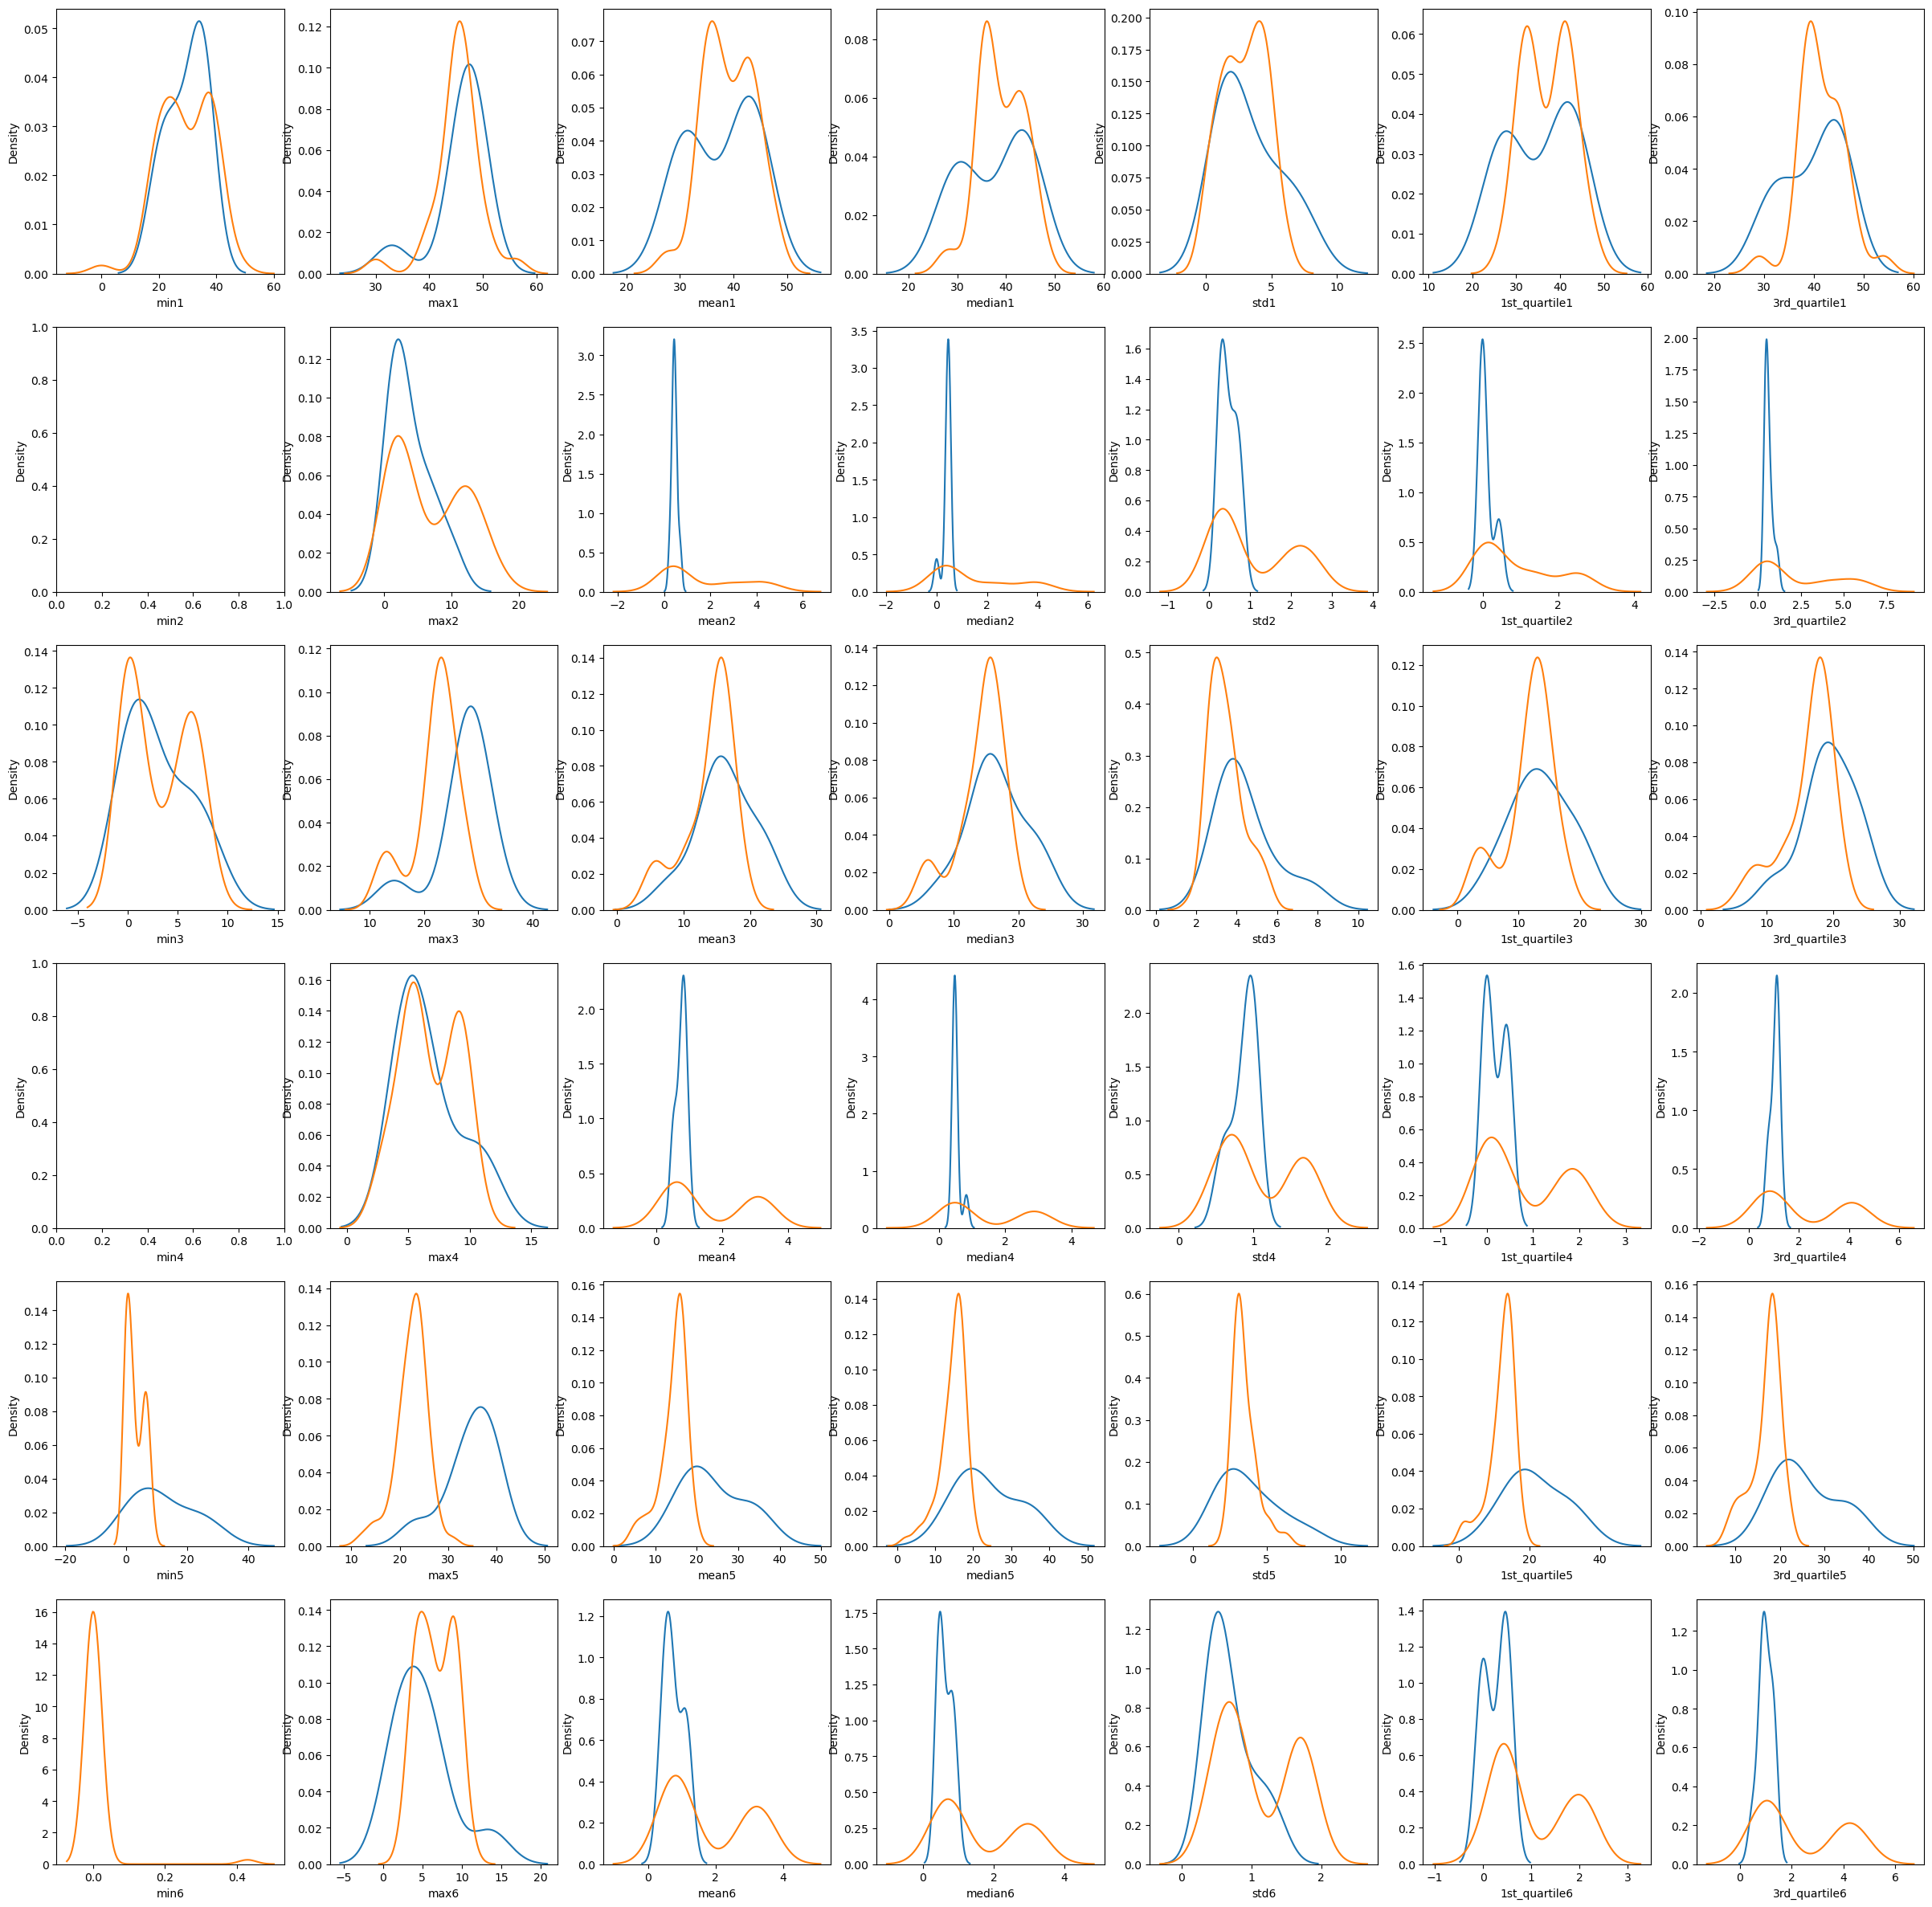

In [249]:
# converting label from text to 1 or 0 depending on whether the label is ('bending1', 'bending2') or not respectively
train_df = pd.DataFrame(train_data)
temp = train_df['label']
train_df.loc[temp.isin(['bending1', 'bending2']), 'label'] = 1
train_df.loc[temp != 1, 'label'] = 0
train_data


fig, axs = plt.subplots(6,7, figsize=(30, 30))

for i in range(1,7):
    j = 0
    for stat in OR_STATS:
        bending_df = train_data.loc[train_data['label'] == 1, stat + str(i)]
        not_bending_df = train_data.loc[train_data['label'] == 0, stat + str(i)]
        sns.kdeplot(ax = axs[i-1,j], data = bending_df, label='Bending')
        sns.kdeplot(ax = axs[i-1,j], data = not_bending_df, label='Not Bending')
        j = j+1

plt.show()

Since this is a regression problem, the choice of important time-domain features will be majorly driven by the feasibility of demarkation and there should be relatively clear separated distribution and hence the choice would be - 
- max
- mean
- 3rd quartile

# Time Series Classification Part 2

## Binary Classification Using Logistic Regression

In [250]:
def get_cols(indexes, props):
    cols = [prop + str(index) for index in indexes for prop in props]
    return cols

def get_labelled_cols(df, cols):
    df['label'] = df['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)
    return cols + ['label']

def plot_scatter_plot(df, hue_value):
    sns.pairplot(df, hue=hue_value)
    plt.show()

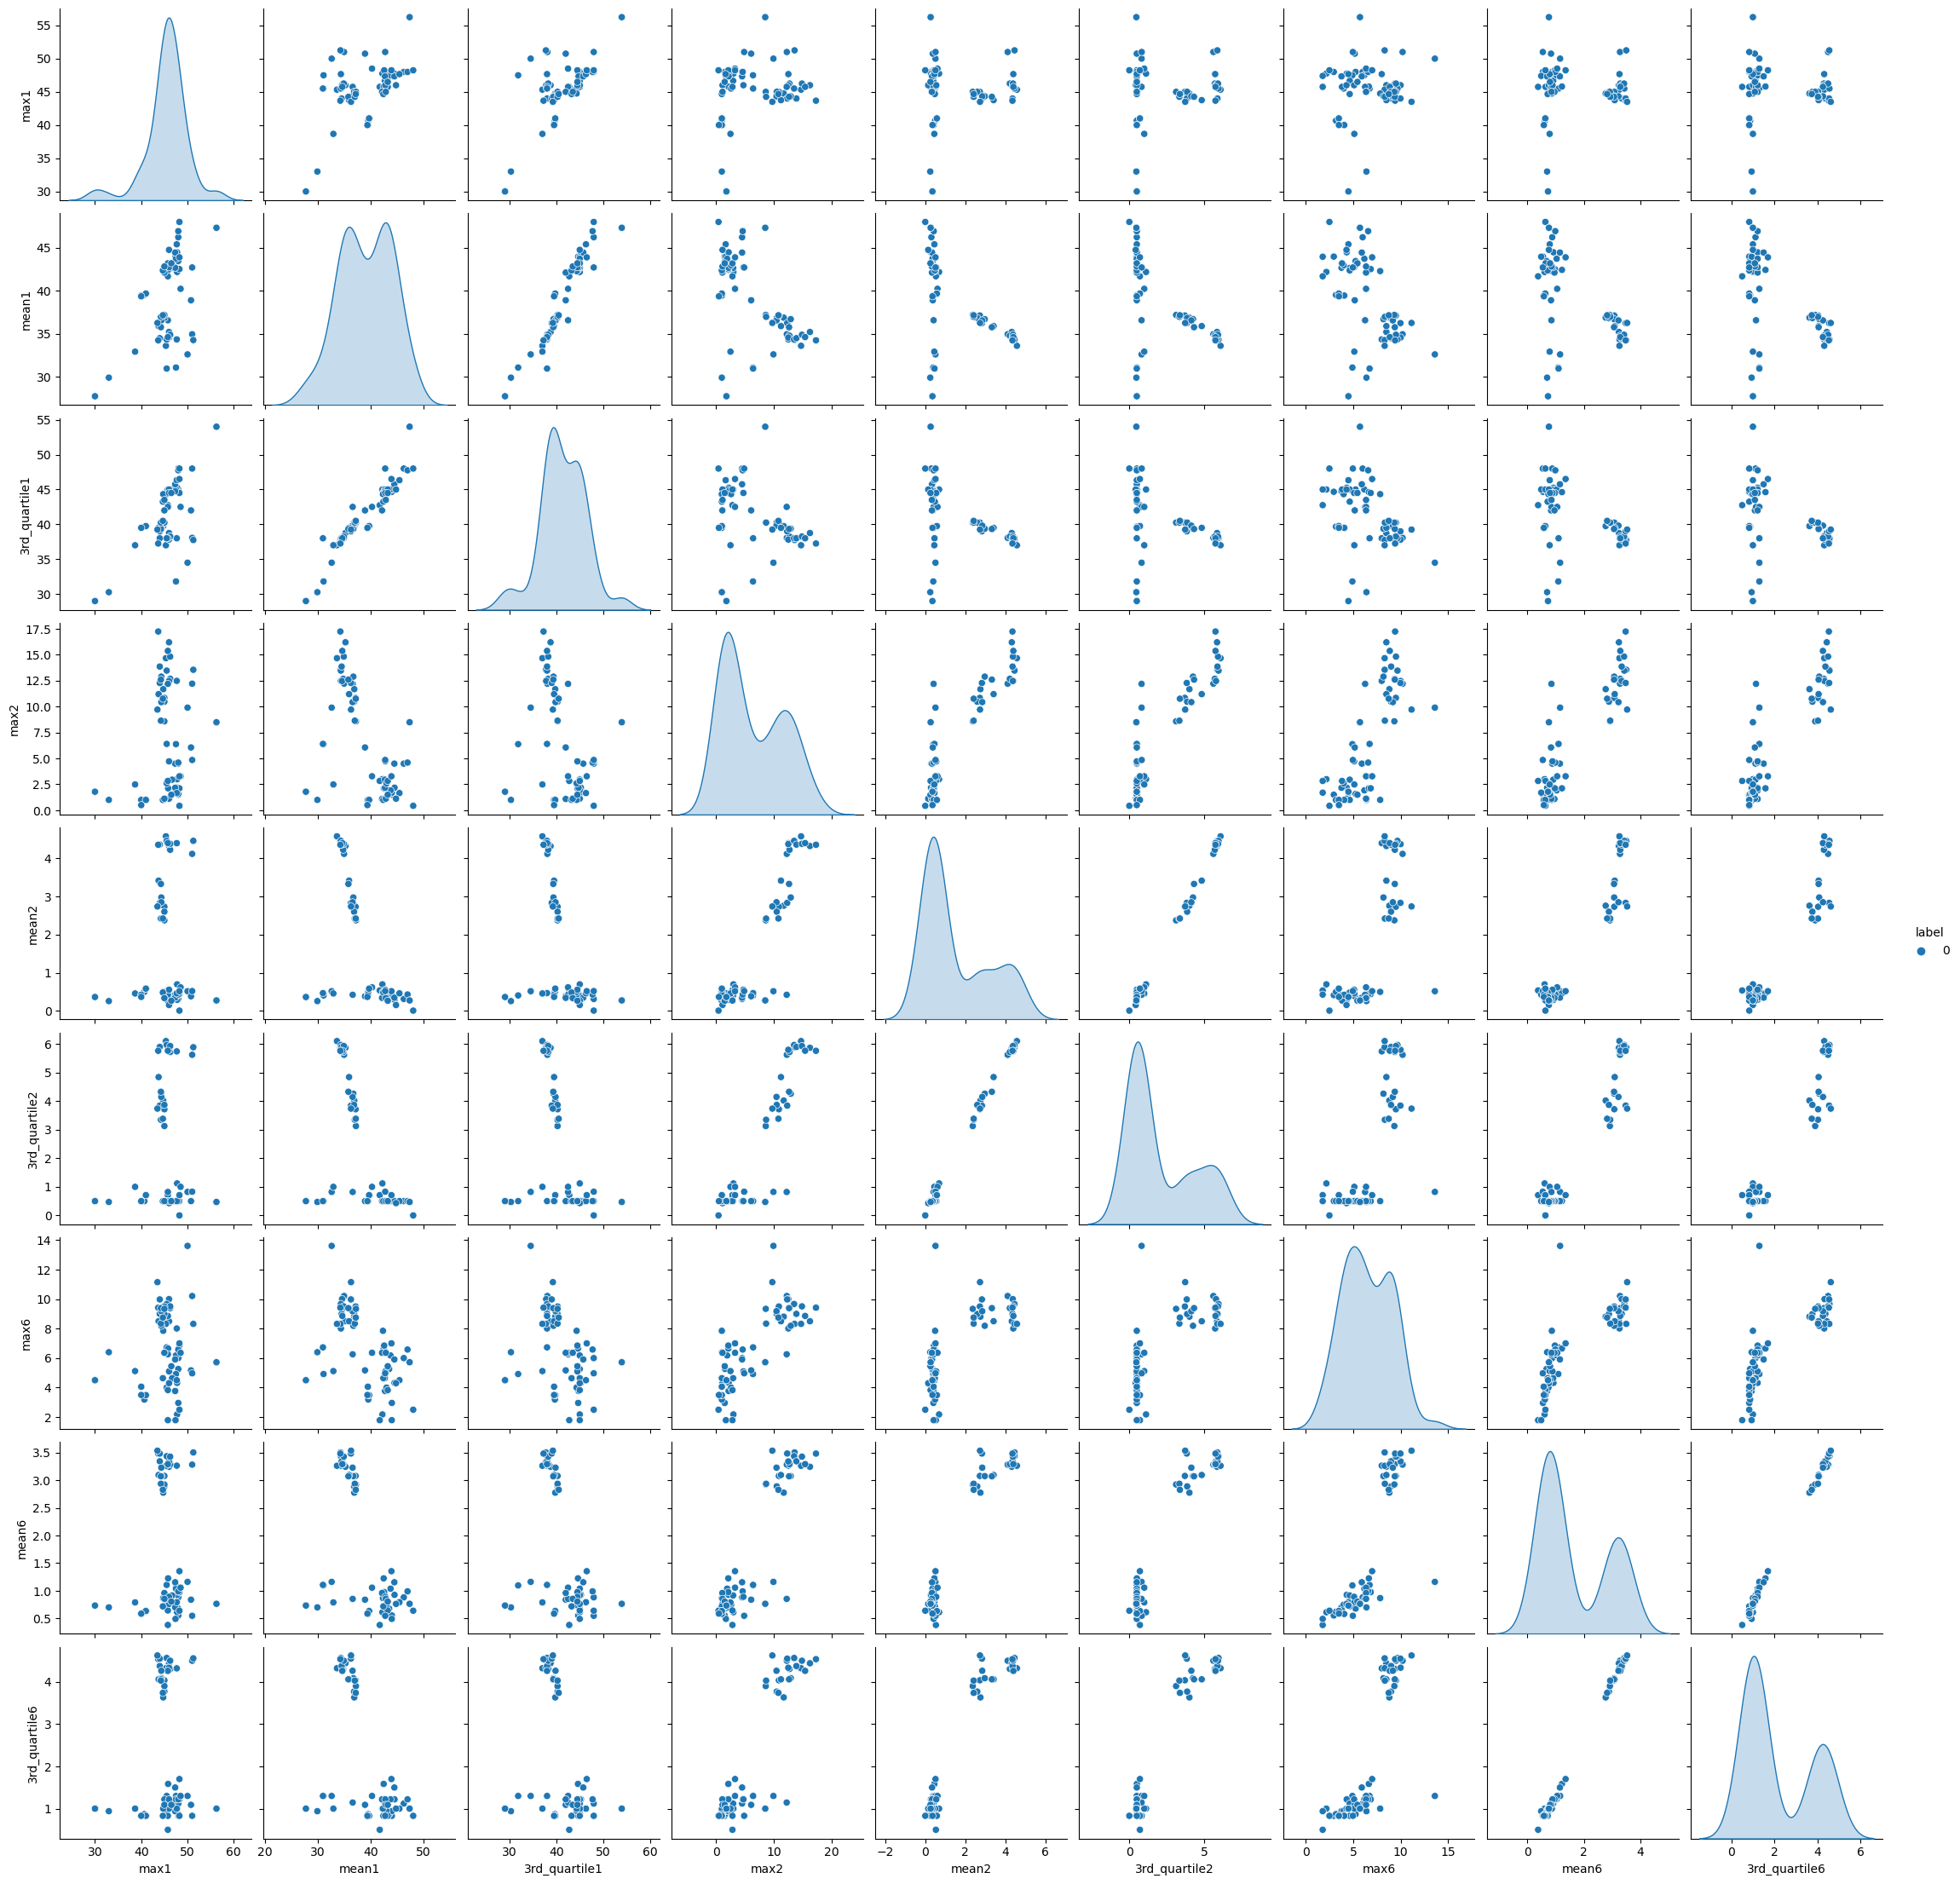

In [251]:
relevant_columns = get_cols([1, 2, 6], ['max', 'mean', '3rd_quartile'])
relevant_columns_labelled = get_labelled_cols(train_data, relevant_columns)
relevant_df = train_data[relevant_columns_labelled]
plot_scatter_plot(relevant_df, 'label')

Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 3(c)v, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable difference in
the results with those of 3(c)v?

In [252]:
# utility method to convert text labels into binary classified 0 and 1 labels
def get_binary_labelled_dataframe(df):
    temp = df['label']
    df.loc[temp.isin(['bending1', 'bending2']), 'label'] = 1
    df.loc[temp != 1, 'label'] = 0
    return df

In [253]:
features = []
for i in range(1, 13):
    for stat in OR_STATS:
        col_name = f'{stat}{i}'
        features.append(col_name)

train_data_two = load_data(train, features, OG_COLUMN_NAMES, segs=2)
test_data_two = load_data(test, features, OG_COLUMN_NAMES, segs=2)

In [254]:
train_df_two = get_binary_labelled_dataframe(pd.DataFrame(train_data_two))
train_df_two

min1   max1      mean1  median1      std1  1st_quartile1  3rd_quartile1  \
0   36.67  45.00  43.486208    43.71  1.281976        42.3300          44.50   
1   39.00  48.00  44.117042    45.00  1.359836        43.5000          45.00   
2   33.75  47.75  43.278875    45.00  3.473355        42.0000          45.25   
3   33.00  45.75  41.621208    42.33  3.118644        39.6525          44.25   
4   36.50  46.50  44.057167    44.50  1.556971        43.2500          45.00   
..    ...    ...        ...      ...       ...            ...            ...   
64  20.00  44.25  35.692167    35.50  4.643595        33.0000          39.25   
65  24.25  45.00  36.954208    36.00  3.772836        34.2500          40.25   
66  27.00  42.67  36.337908    36.75  3.655379        33.6700          39.00   
67  26.25  43.40  36.865417    36.25  3.462793        34.3100          40.00   
68  27.75  44.00  37.132636    36.67  3.808255        34.0000          40.33   

    min2   max2     mean2  ...  1st_quartile11  3rd_quartile11  min12  max12  \
0    0.0   1.30  0.378667  ...          21.000         23.5000    0.0   2.96   
1    0.0   1.30  0.250042  ...          22.500         23.7500    0.0   4.06   
2    0.0   3.00  0.673292  ...          28.750         33.7500    0.0   2.18   
3    0.0   2.83  0.623083  ...          28.310         30.5625    0.0   1.50   
4    0.0   1.50  0.381042  ...          33.000         36.2500    0.0   1.50   
..   ...    ...       ...  ...             ...             ...    ...    ...   
64   0.0  11.39  3.324208  ...          14.000         18.2500    0.0   8.81   
65   0.0   8.18  2.392667  ...          18.000         21.6700    0.0   9.34   
66   0.0   9.71  2.698494  ...          16.125         21.0000    0.0  11.15   
67   0.0   7.46  2.387250  ...          14.330         18.0000    0.0   8.34   
68   0.0  10.76  2.388870  ...          15.000         18.7500    0.0   7.93   

      mean12  median12     std12  1st_quartile12  3rd_quartile12  label  
0   0.585750      0.50  0.487918          0.4225          0.8300      1  
1   0.543875      0.50  0.473445          0.4300          0.7100      1  
2   0.586083      0.47  0.491873          0.0000          0.8700      1  
3   0.347500      0.43  0.363144          0.0000          0.5000      1  
4   0.388333      0.00  0.478528          0.0000          0.7100      1  
..       ...       ...       ...             ...             ...    ...  
64  2.966917      2.59  1.712062          1.8525          3.7400      0  
65  2.838083      2.45  1.890755          1.3825          3.8325      0  
66  3.530669      3.08  1.998170          2.1700          4.5150      0  
67  2.904458      2.57  1.609793          1.6900          3.7700      0  
68  2.727866      2.55  1.588045          1.5000          3.7000      0  

[69 rows x 85 columns]

In [255]:
test_df_two = get_binary_labelled_dataframe(pd.DataFrame(test_data_two))
test_df_two

min1   max1      mean1  median1      std1  1st_quartile1  3rd_quartile1  \
0   38.00  42.33  40.946958   41.250  1.102963        40.3100        42.0000   
1   41.75  44.25  42.643292   42.500  0.641849        42.0000        43.3300   
2   22.33  42.50  34.334833   35.750  4.772089        30.4750        37.7500   
3   18.67  45.00  33.762958   34.500  5.001292        30.7500        37.3125   
4   15.00  45.33  33.591625   34.250  5.121057        30.0000        37.0000   
5   12.75  51.00  24.675375   24.330  4.856867        22.2500        26.7500   
6   26.50  31.33  29.071583   29.500  1.133954        28.2500        30.0000   
7   38.50  48.00  46.127875   46.500  1.151699        45.5000        46.7500   
8   35.50  45.00  43.043292   43.500  1.874343        42.5000        44.5000   
9   37.00  46.50  44.447083   45.000  1.667042        44.1875        45.5000   
10  40.50  44.00  42.681292   42.585  0.803629        42.0000        43.5000   
11  37.00  50.75  45.811458   45.000  1.421195        45.0000        46.5000   
12  45.00  46.75  45.409875   45.250  0.529789        45.0000        45.7500   
13  23.50  29.75  27.368417   27.000  1.295725        27.0000        28.7500   
14  24.75  48.25  40.361042   48.000  9.125029        29.5000        48.0000   
15  48.00  48.25  48.001042   48.000  0.016137        48.0000        48.0000   
16  24.25  45.00  36.954208   36.000  3.772836        34.2500        40.2500   
17  29.25  44.75  37.592250   37.000  3.127179        35.2500        39.7500   
18  28.00  44.67  37.740667   36.710  3.536378        35.2500        40.7500   

    min2   max2     mean2  ...  1st_quartile11  3rd_quartile11  min12  max12  \
0   0.00   1.22  0.375667  ...         31.3100         36.5000    0.0   1.92   
1   0.00   0.94  0.355000  ...         30.0000         33.7500    0.0   3.11   
2   0.00  12.19  3.974958  ...         14.7500         18.5000    0.0   8.86   
3   0.43  13.05  4.400833  ...         14.7300         18.8125    0.0   8.96   
4   0.00  12.53  4.573042  ...         14.1875         18.5000    0.0   8.26   
5   0.00   6.87  0.774500  ...         19.4575         21.7500    0.0   4.97   
6   0.00   1.25  0.231208  ...         12.3300         20.7625    0.0   6.76   
7   0.00   1.79  0.424542  ...          7.0000         12.0000    0.0   3.77   
8   0.00   2.12  0.500667  ...         13.6700         17.0000    0.0   4.64   
9   0.00   1.73  0.410458  ...         11.7500         18.8125    0.0   5.73   
10  0.00   1.12  0.365875  ...         14.5000         18.7500    0.0   5.85   
11  0.00   4.87  0.204167  ...         17.0000         20.7500    0.0   7.22   
12  0.00   1.00  0.260750  ...         17.7500         21.0000    0.0   3.49   
13  0.00   1.79  0.308042  ...          3.3300         10.0000    0.0   3.30   
14  0.00   3.11  0.194583  ...          1.5000          2.5000    0.0   3.77   
15  0.00   0.43  0.001792  ...          9.5000         10.7500    0.0   1.30   
16  0.00   8.18  2.392667  ...         18.0000         21.6700    0.0   9.34   
17  0.00   8.95  2.111625  ...         18.2500         21.5425    0.0   9.62   
18  0.00  12.99  2.147167  ...         14.1875         19.3125    0.0   8.55   

      mean12  median12     std12  1st_quartile12  3rd_quartile12  label  
0   0.552167     0.430  0.510494          0.0000          0.9400      1  
1   0.533583     0.430  0.575061          0.0000          0.8700      1  
2   3.400750     3.080  1.804246          2.0600          4.5000      0  
3   3.378250     3.110  1.803453          2.0575          4.4550      0  
4   3.206833     2.980  1.710663          1.9800          4.2450      0  
5   0.936917     0.810  0.818833          0.4700          1.0975      1  
6   1.473250     1.220  1.238675          0.5000          1.9525      1  
7   0.870042     0.820  0.678663          0.4600          1.1450      0  
8   0.874750     0.830  0.635470          0.4700          1.1700      0  
9   0.906500     0.830  0.741206          0.4300          1.220

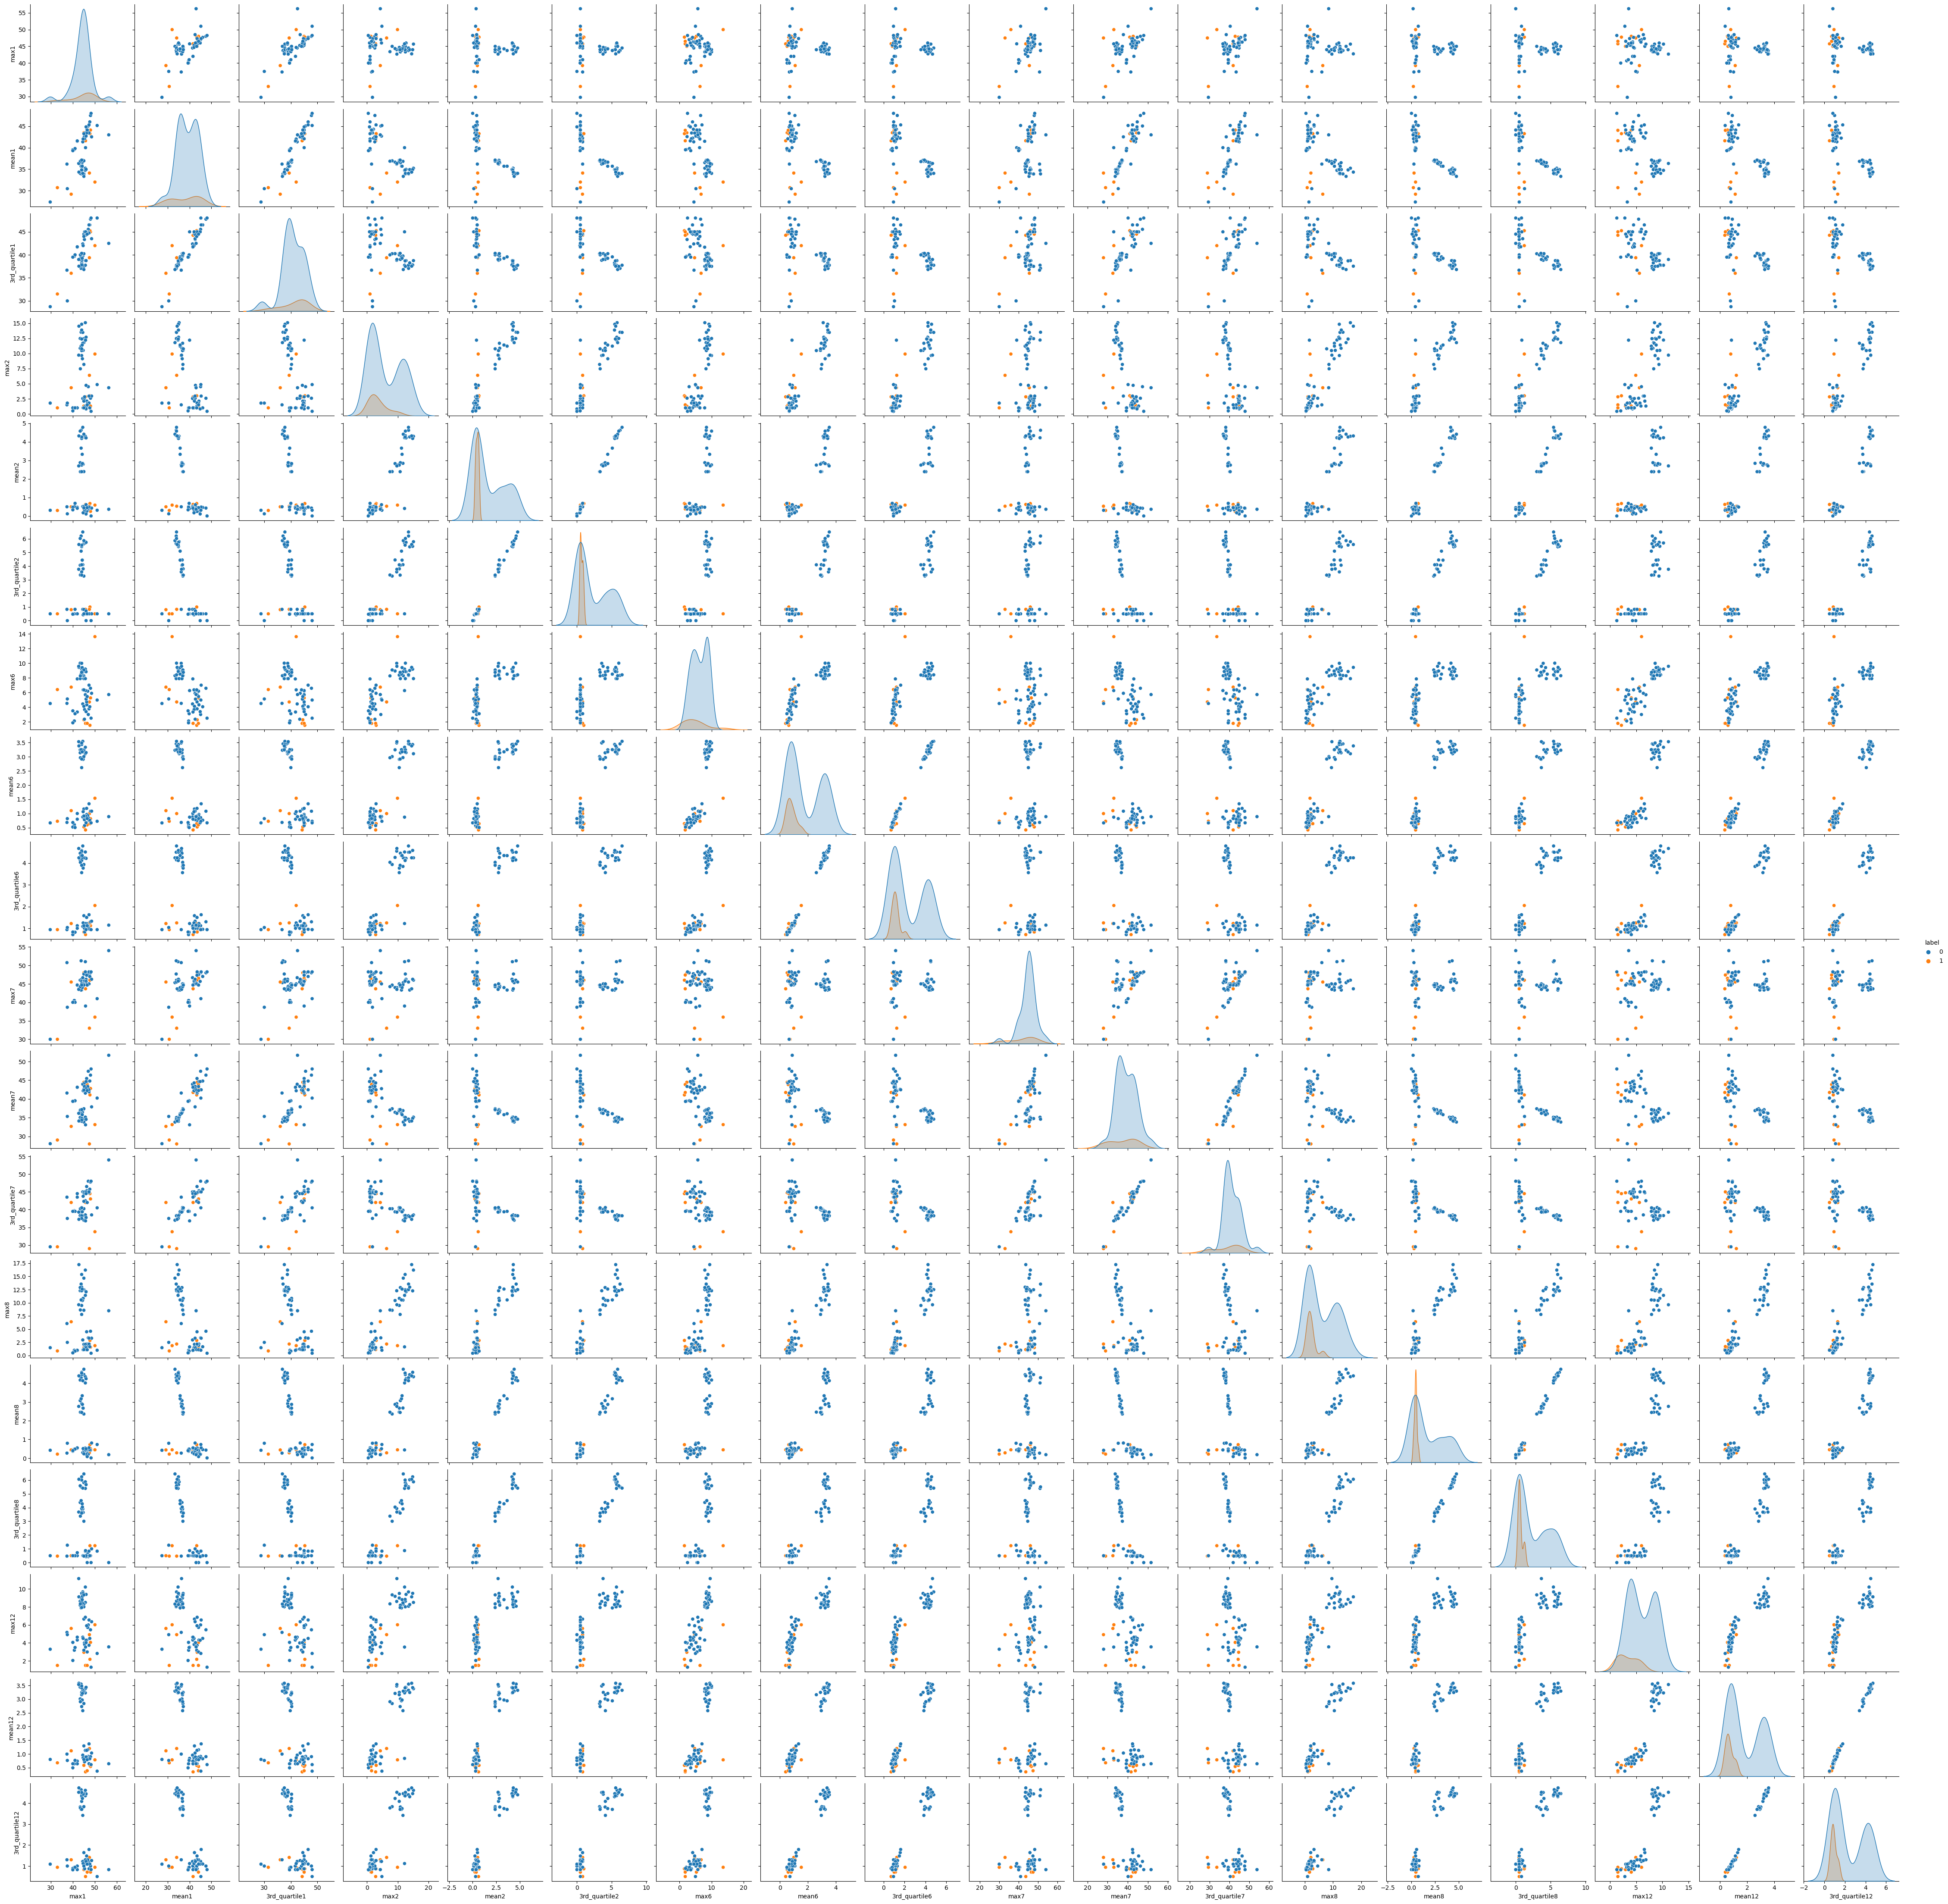

In [256]:
relevant_columns_two = get_cols([1, 2, 6, 7, 8, 12], ['max', 'mean', '3rd_quartile'])
relevant_columns_labelled_two = get_labelled_cols(train_data, relevant_columns_two)
relevant_df_two = train_data_two[relevant_columns_labelled_two]
plot_scatter_plot(relevant_df_two, 'label')

**Observation**
> Both of the results seem to be pretty similar. There is no significant difference between the two.

Break each time series in your training set into l in set {1, 2, ..., 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.
Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.   
In the following, you can see an example of applying Python's Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.

In [257]:
def get_features(stats, range_end):
    features = [f'{stat}{i}' for i in range(1, range_end) for stat in stats]
    return features

In [258]:
def oversample_data_set(data_set):
    print('Performing oversampling of dataset...')
    label_counts = data_set['label'].value_counts()
    minor_label = label_counts.idxmin()
    major_label = label_counts.idxmax()

    minor_ds = data_set[data_set['label'] == minor_label]
    major_ds = data_set[data_set['label'] == major_label]
    oversampled_minor_ds = resample(minor_ds, replace=True, random_state=60, n_samples=label_counts[major_label])
    oversampled_data_set = pd.concat([major_ds, oversampled_minor_ds])
    
    return oversampled_data_set

In [259]:
def convert_text_labels_to_boolean(df):
    df['label'] = df['label'].apply(lambda x: "1" if x in ['bending1', 'bending2'] else "0")
    return df

In [260]:
def get_data_X_Y(data_set):
    dataX = data_set.iloc[:, :-1]
    dataY = data_set.iloc[:, -1]
    return dataX, dataY

In [261]:
def logistic_regression(train_files, l_val, fold_num, oversample=False, penalty='none'):
    print(f'Running Logistic Regression for l-value {l_val}')
    features = get_features(OR_STATS, 6 * l_val + 1)
    train_set = load_data(train_files, features, OG_COLUMN_NAMES, segs=l_val)
    train_set = convert_text_labels_to_boolean(pd.DataFrame(train_set))
    
    if oversample:
        train_set = oversample_data_set(train_set)
    
    trainX, trainY = get_data_X_Y(train_set)
    
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    validator = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=69)
    model = LogisticRegression(penalty=penalty, solver=solver, max_iter=100)
    selector = RFECV(estimator=model, cv=validator, scoring='accuracy')
    selector.fit(trainX, trainY)
    return model, selector

In [262]:
cross_validation_factor = 5
L = 20
combination = {
    'pair(l, p)': [],
    'score': []
}
for l_val in range(1, L + 1):
    model, selector = logistic_regression(train, l_val, cross_validation_factor, oversample=False)
    nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    combination['pair(l, p)'].append((l_val, nf))
    combination['score'].append(round(score, 4))

df = pd.DataFrame(combination)
df

Running Logistic Regression for l-value 1


Running Logistic Regression for l-value 2
Running Logistic Regression for l-value 3
Running Logistic Regression for l-value 4
Running Logistic Regression for l-value 5
Running Logistic Regression for l-value 6
Running Logistic Regression for l-value 7
Running Logistic Regression for l-value 8
Running Logistic Regression for l-value 9
Running Logistic Regression for l-value 10
Running Logistic Regression for l-value 11
Running Logistic Regression for l-value 12
Running Logistic Regression for l-value 13
Running Logistic Regression for l-value 14
Running Logistic Regression for l-value 15
Running Logistic Regression for l-value 16
Running Logistic Regression for l-value 17
Running Logistic Regression for l-value 18
Running Logistic Regression for l-value 19
Running Logistic Regression for l-value 20


pair(l, p)   score
0      (1, 6)  1.0000
1      (2, 5)  0.9429
2      (3, 7)  0.9857
3      (4, 9)  0.9714
4      (5, 3)  0.9857
5     (6, 36)  0.9857
6     (7, 16)  0.9714
7     (8, 31)  0.9714
8     (9, 43)  0.9857
9    (10, 47)  0.9714
10    (11, 9)  0.9857
11   (12, 85)  0.9857
12   (13, 12)  0.9857
13   (14, 15)  0.9714
14   (15, 37)  0.9857
15   (16, 12)  0.9857
16   (17, 11)  0.9857
17    (18, 9)  0.9857
18   (19, 10)  0.9857
19   (20, 11)  0.9857

**Observation:**

> - The goal of cross-validation is to estimate the test error. We aim to ensure that our algorithm is fully equipped with the knowledge of the diverse predictors at our dataset's disposal to fit the real world, avoiding any deprivation. Hence, the correct way would be to do the Recursive Feature Elimination along with Cross Validation.
> - The other way round, e.g. select predictors before performing Cross Validation is the wrong way.

Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression betas as well as the p-values associated with them.

In [263]:
def get_selected_features(features, selector):
    selected_features = [feature for feature, support in zip(features, selector.support_) if support]
    return selected_features

In [264]:
# Extracting the selected features
l_value = 1
fold_count = 5
features = get_features(OR_STATS, 6 * l_value + 1)
classifier, selector = logistic_regression(train, l_value, fold_count)
selected_features = get_selected_features(features, selector)
selected_features

Running Logistic Regression for l-value 1


['mean1', '3rd_quartile1', 'max2', 'min5', 'max5', '1st_quartile5']

In [265]:
# p-value calculation using statmodel package
train_set = load_data(train, selected_features, OG_COLUMN_NAMES, segs=1)
train_set = convert_text_labels_to_boolean(pd.DataFrame(train_set))
trainX, trainY = get_data_X_Y(train_set)
df_temp = trainX.loc[:, selected_features]
const_val = sm.add_constant(df_temp.to_numpy(dtype=float))
model = sm.Logit(trainY.to_numpy(dtype=float), const_val)
summary = model.fit(method='bfgs').summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Jul 2023   Pseudo R-squ.:                   1.000
Time:                        22:40:40   Log-Likelihood:            -8.8338e-06
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 9.588e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7796   1.51e+07  -5.1

In [266]:
# utility method to plot the ROC curve and AUC
def plot_roc_curve(Y_true, predictedY_prob, classifier):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title("ROC curves")
    for i, clazz in enumerate(classifier.classes_):
        y_predicted = predictedY_prob[:, i]
        fpr, tpr, thresholds = roc_curve(Y_true, y_predicted, pos_label=clazz)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label=f"Class: {clazz}; ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

In [267]:
# utility method to perform classification and plot the ROC curve together
def classification_and_roc_calculation(dataX, dataY, selected_features, isTest=False):
    if not isTest:
        classifier.fit(dataX.loc[:, selected_features], dataY.to_numpy(dtype="int"))
    predictY = classifier.predict(dataX.loc[:, selected_features])
    
    predictY_prob = classifier.predict_proba(dataX.loc[:, selected_features])
    y_true = dataY.to_numpy(dtype=float)
    y_pred = predictY.round()
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    plot_roc_curve(y_true, predictY_prob, classifier)

[[60  0]
 [ 0  9]]


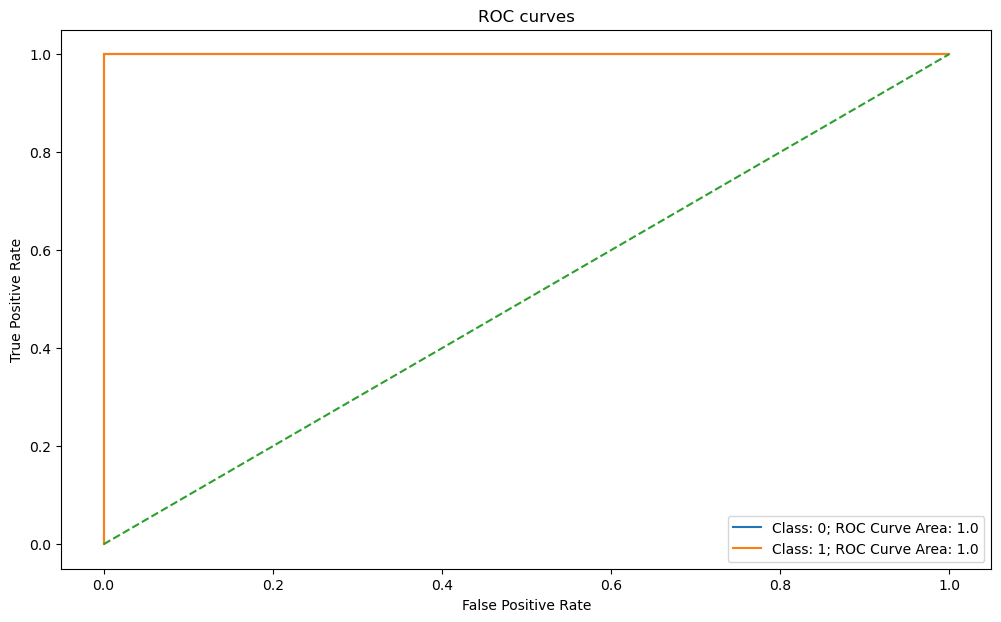

In [268]:
classification_and_roc_calculation(trainX, trainY, selected_features)

Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set.  
Remember that the classifier has to be tested using the features extracted from the test set.  
Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [269]:
test_set = load_data(test, selected_features, OG_COLUMN_NAMES, segs=1)
test_set = convert_text_labels_to_boolean(pd.DataFrame(test_set))
testX, testY = get_data_X_Y(test_set)
testX

mean1  3rd_quartile1   max2   min5   max5  1st_quartile5
0   40.624792        42.0000   1.30  27.25  38.25        33.0000
1   42.812812        43.6700   1.22  27.67  38.50        32.0000
2   34.227771        37.7500  14.50   6.75  26.00        14.7500
3   33.509729        36.7500  13.05   7.25  25.00        14.6275
4   34.660583        38.2500  13.44   7.00  24.50        14.2500
5   24.562958        26.5000   6.87  10.67  30.00        20.5000
6   27.464604        30.0000   7.76   0.00  33.00        15.0000
7   44.334729        46.5000   3.90   0.00  23.00         9.3300
8   43.174938        44.5000   2.12   2.00  21.25        12.7500
9   42.760562        45.3725   3.34   1.33  21.33        13.0000
10  42.363563        43.5000   4.44   1.00  28.00        10.1875
11  45.917667        46.5000   4.87   2.00  24.00        16.5000
12  45.239667        45.3300   1.00   4.75  26.75        17.6275
13  27.716375        29.0000   1.79   0.00  21.00         5.5000
14  44.182937        48.0000   3.11   0.00  12.75         2.0000
15  48.004167        48.0000   0.43   0.00  12.00         4.6700
16  37.177042        40.2500   8.58   7.00  25.50        17.9500
17  37.561187        40.2500   9.91  10.50  24.33        18.0000
18  37.058708        40.0625  14.17   7.50  24.25        16.0000

[[15  0]
 [ 0  4]]


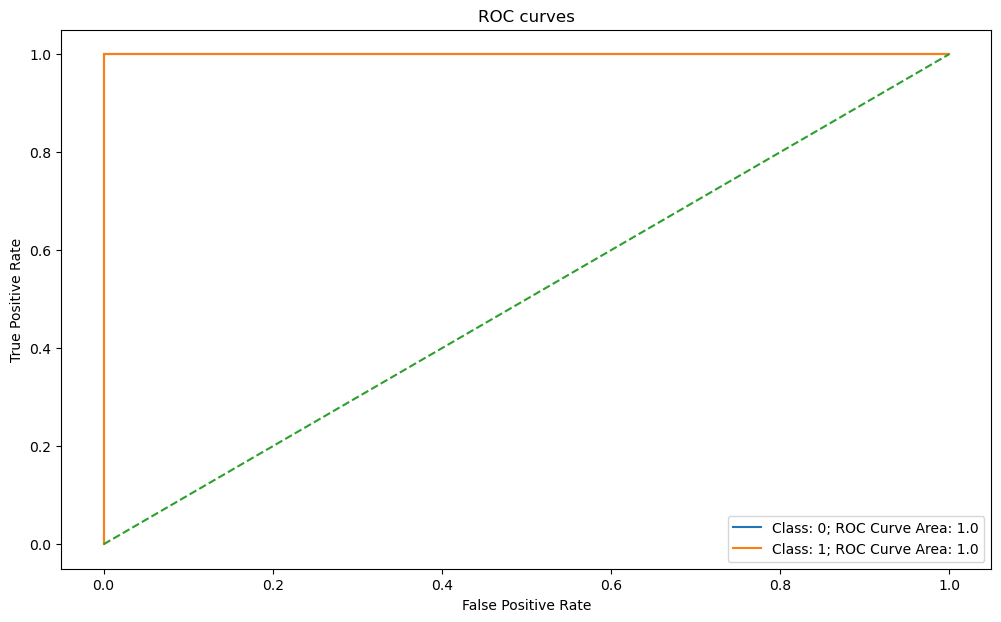

In [270]:
classification_and_roc_calculation(testX, testY, selected_features, isTest=True)

**Observation:**
> The accuracy for test as well as cross validation seems to be almost same.

Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

**ANS**
> - The p-value analysis suggests that there is Complete Separation.
> - Due to this finding, it is possible that the well-separation of the classes result in instability in calculating logistic regression. It is because logistic regressino doesn't like well-separated data.

From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

**ANS**
> According to the confusion matrices, there are 69 instances of non-bending classes and 9 instances for bending classes which shows that the classes are definitely imbalanced.
> 
> So, the answer of imbalanced or not is yes. Hence, we will have to build a regression model on case-controlled sampling e.g. we will have to oversample.

In [271]:
# Logistic Regression with oversampling
print("Performing logistic regression with oversampling=True")
cross_validation_factor = 5
L = 20
combination = {
    'pair(l, p)': [],
    'score': []
}
for l_val in range(1, L + 1):
    model, selector = logistic_regression(train,l_val, cross_validation_factor, oversample=True)
    nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    combination['pair(l, p)'].append((l_val, nf))
    combination['score'].append(round(score, 4))

df = pd.DataFrame(combination)
df

Performing logistic regression with oversampling=True
Running Logistic Regression for l-value 1
Performing oversampling of dataset...
Running Logistic Regression for l-value 2
Performing oversampling of dataset...
Running Logistic Regression for l-value 3
Performing oversampling of dataset...
Running Logistic Regression for l-value 4
Performing oversampling of dataset...
Running Logistic Regression for l-value 5
Performing oversampling of dataset...
Running Logistic Regression for l-value 6
Performing oversampling of dataset...
Running Logistic Regression for l-value 7
Performing oversampling of dataset...
Running Logistic Regression for l-value 8
Performing oversampling of dataset...
Running Logistic Regression for l-value 9
Performing oversampling of dataset...
Running Logistic Regression for l-value 10
Performing oversampling of dataset...
Running Logistic Regression for l-value 11
Performing oversampling of dataset...
Running Logistic Regression for l-value 12
Performing oversampli

pair(l, p)   score
0      (1, 4)  1.0000
1      (2, 7)  0.9833
2      (3, 3)  1.0000
3      (4, 3)  0.9917
4      (5, 3)  0.9917
5      (6, 3)  0.9917
6      (7, 2)  0.9917
7      (8, 3)  0.9917
8      (9, 9)  1.0000
9     (10, 6)  1.0000
10    (11, 2)  0.9917
11    (12, 8)  1.0000
12    (13, 4)  1.0000
13    (14, 7)  1.0000
14    (15, 9)  1.0000
15    (16, 8)  1.0000
16    (17, 4)  1.0000
17    (18, 3)  1.0000
18    (19, 6)  1.0000
19    (20, 7)  1.0000

In [272]:
l_value = 1
fold_count = 5
features = get_features(OR_STATS, 6 * l_value + 1)
classifier, selector = logistic_regression(train, l_value, fold_count, oversample=True)
selected_features = get_selected_features(features, selector)
selected_features

Running Logistic Regression for l-value 1
Performing oversampling of dataset...


['3rd_quartile1', 'min5', 'max5', 'mean5']

Performing oversampling of dataset...
[[60  0]
 [ 0 60]]


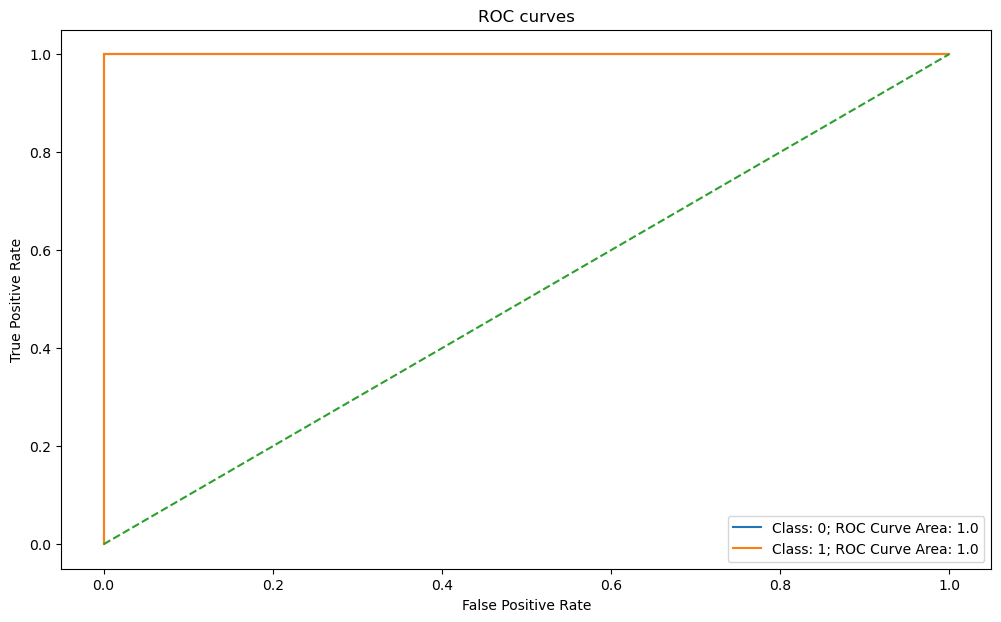

In [273]:
train_set = load_data(train, selected_features, OG_COLUMN_NAMES, segs=1)
train_set = convert_text_labels_to_boolean(pd.DataFrame(train_set))
train_set = oversample_data_set(train_set)
trainX, trainY = get_data_X_Y(train_set)
classification_and_roc_calculation(trainX, trainY, selected_features)

[[15  0]
 [ 0  4]]


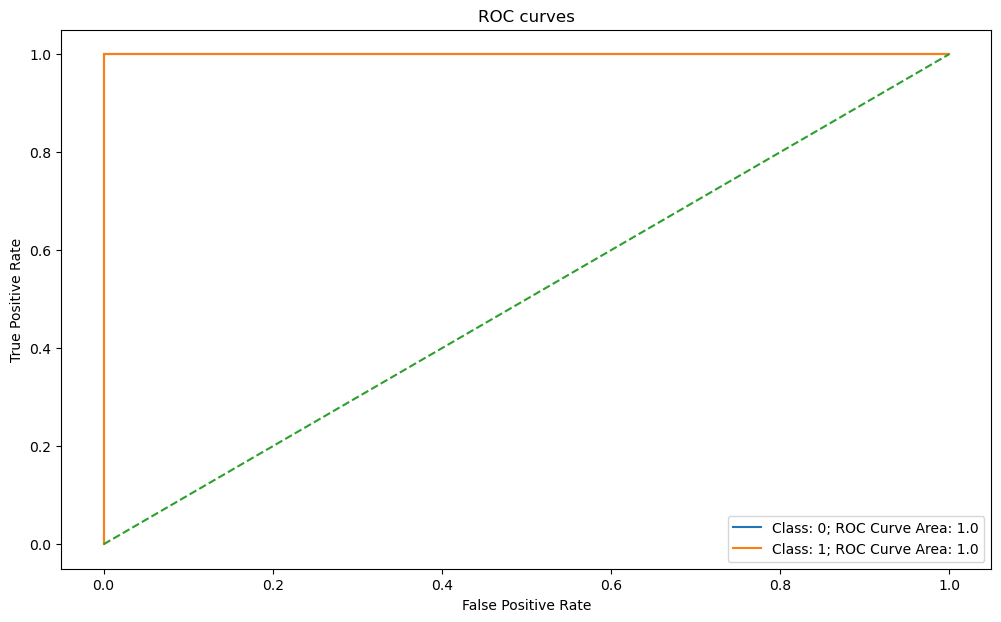

In [274]:
test_set = load_data(test, selected_features, OG_COLUMN_NAMES, segs=1)
test_set = convert_text_labels_to_boolean(pd.DataFrame(test_set))
# test_set = oversample_data_set(test_set)
testX, testY = get_data_X_Y(test_set)
classification_and_roc_calculation(testX, testY, selected_features)

## (b) Binary Classification Using L1-penalized logistic regression

Repeat (a)ii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and lambda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for lambda automatically.

In [275]:
max_test_accuracy = 0
optimal_L = 1

In [276]:
# utility  method for performing regression based on the given classifier
def perform_regression_with_classifier(classifier, classifier_name, l_val, kwargs, penalty='none', 
                              is_binary_classification=True, draw_roc=False):
    print(f'Running {classifier_name} for l-value {l_val}')
    features = get_features(OR_STATS, 6 * l_val + 1)
    train_set = load_data(train, features, OG_COLUMN_NAMES, segs=l_val)
    test_set = load_data(test, features, OG_COLUMN_NAMES, segs=l_val)
    
    if is_binary_classification:
        train_set = get_binary_labelled_dataframe(pd.DataFrame(train_set))
        test_set = get_binary_labelled_dataframe(pd.DataFrame(test_set))
        
    trainX, trainY = get_data_X_Y(train_set)
    testX, testY = get_data_X_Y(test_set)
    
    if is_binary_classification:
        # https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown
        trainY = trainY.astype('int')
        testY = testY.astype('int')
    
    classifier2 = classifier(**kwargs)
    classifier2.fit(trainX, trainY)
    
    if not draw_roc:    
        train_score = round(classifier2.score(trainX, trainY), 4)
        test_score = round(classifier2.score(testX, testY), 4)
        print(f'Value of L: {l_val} | train_score: {train_score} | test_score: {test_score}')
        print(f'Value of L: {l_val} | train_error: {round((1 - train_score), 4)} | test_error: {round((1 - test_score), 4)}\n')
        global max_test_accuracy
        global optimal_L
        if test_score > max_test_accuracy:
            max_test_accuracy = test_score
            optimal_L = l_val
        
        if l_val == 20:
            print('\n')
            print(f'The maximum accuracy is {max_test_accuracy} (for L-value: {optimal_L})')
            print(f'Further calculations will be done with L-value: {optimal_L}')
        
    else:
        train_predictY_prob = classifier2.predict_proba(trainX)
        test_predictY_prob = classifier2.predict_proba(testX)

        predictY = classifier2.predict(testX)
        cm = confusion_matrix(testY, predictY)
        print(f"Confusion matrix for test data:\n{cm}")
        
        print("ROC Curve for Train Data")
        plot_roc_curve(trainY, train_predictY_prob, classifier2)
        
        print("ROC Curve for Test Data")
        plot_roc_curve(testY, test_predictY_prob, classifier2)

In [277]:
# making use of the varargs concept
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100,
    'scoring' : 'accuracy',
    'cv' : 5,
    'random_state' : 69,
    'solver' : 'liblinear'
}

fold_count = 5

# performing regression for each value of L for 20 iterations
for l_val in range(1, 21):
    perform_regression_with_classifier(LogisticRegressionCV,
                                       "Logistic Regression", 
                                       l_val, 
                                       kwargs, 
                                       penalty='none',
                                       is_binary_classification=True, 
                                       draw_roc=False)

Running Logistic Regression for l-value 1
Value of L: 1 | train_score: 1.0 | test_score: 1.0
Value of L: 1 | train_error: 0.0 | test_error: 0.0

Running Logistic Regression for l-value 2
Value of L: 2 | train_score: 0.9565 | test_score: 0.9474
Value of L: 2 | train_error: 0.0435 | test_error: 0.0526

Running Logistic Regression for l-value 3
Value of L: 3 | train_score: 1.0 | test_score: 1.0
Value of L: 3 | train_error: 0.0 | test_error: 0.0

Running Logistic Regression for l-value 4
Value of L: 4 | train_score: 1.0 | test_score: 0.9474
Value of L: 4 | train_error: 0.0 | test_error: 0.0526

Running Logistic Regression for l-value 5
Value of L: 5 | train_score: 1.0 | test_score: 0.9474
Value of L: 5 | train_error: 0.0 | test_error: 0.0526

Running Logistic Regression for l-value 6
Value of L: 6 | train_score: 1.0 | test_score: 0.9474
Value of L: 6 | train_error: 0.0 | test_error: 0.0526

Running Logistic Regression for l-value 7
Value of L: 7 | train_score: 1.0 | test_score: 1.0
Value o

Running Logistic Regression for l-value 1
Confusion matrix for test data:
[[15  0]
 [ 0  4]]
ROC Curve for Train Data


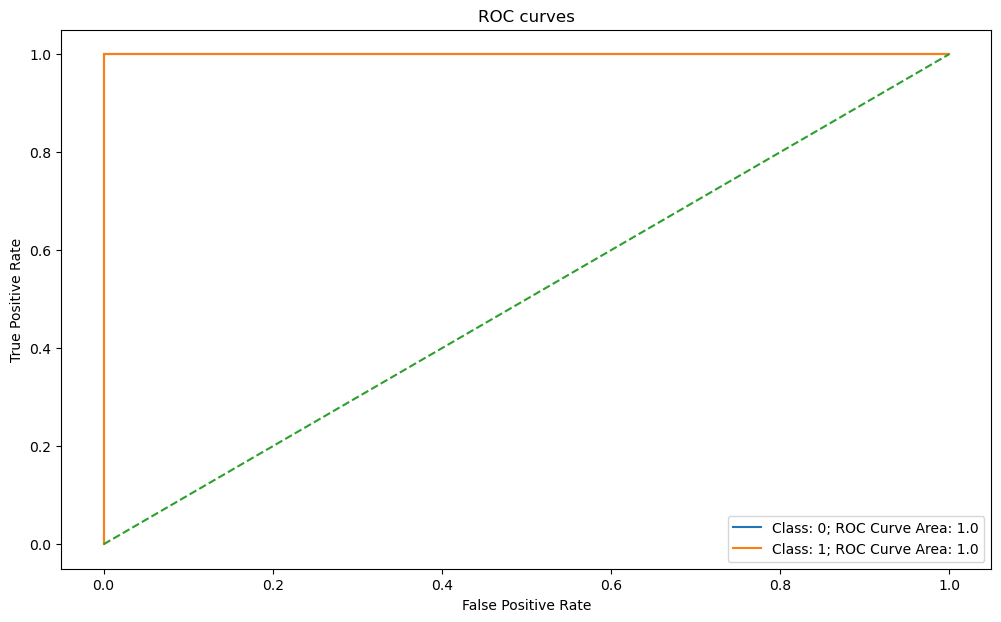

ROC Curve for Test Data


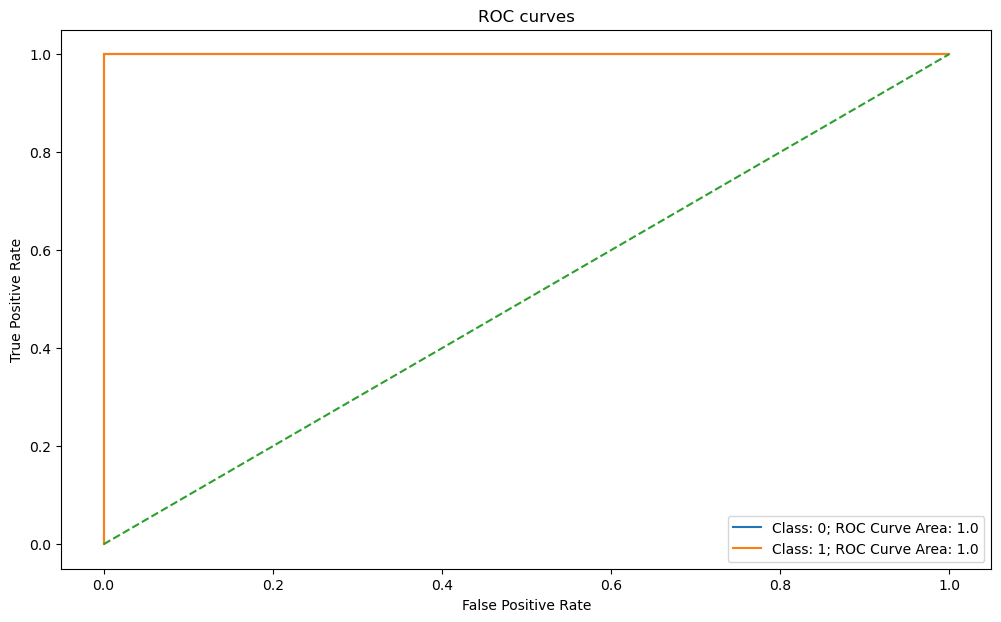

In [278]:
# making use of the varargs concept
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100, 
    'solver' : 'liblinear'
}

fold_count = 5
best_l = 1

# performing regression with the given classifier for the best value of L calculated from the above cell
perform_regression_with_classifier(LogisticRegression,
                                   "Logistic Regression",
                                   best_l, 
                                   kwargs, 
                                   penalty='none',
                                   is_binary_classification=True, 
                                   draw_roc=True)

Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

**ANS**
> - The L1-penalized logistic regression has better performance in terms of accuracy when tested on the test data (approximately ~ 1.0).  
>  Hence, the L1-penalized performs better. THe L1-regularization is easier to implement.

## (c) Multi-class Classification (The Realistic Case)

Find the best l in the same way as you found it in (b)i to build an L1-penalized multinomial regression model to classify all activities in your training set.  
Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [279]:
# making use of the varargs concept
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100,
    'multi_class': 'multinomial',
    'cv': 5,
    'random_state' : 69,
    'solver' : 'saga'
}

fold_count = 5
global max_test_accuracy
max_test_accuracy = 0

global optimal_L
optimal_L = 1

# performing regression for each value of L for 20 iterations
for l_val in range(1, 21):
    perform_regression_with_classifier(LogisticRegressionCV, 
                                       "Logistic Regression",
                                       l_val, 
                                       kwargs, 
                                       penalty='none',
                                       is_binary_classification=False, 
                                       draw_roc=False)

Running Logistic Regression for l-value 1


Value of L: 1 | train_score: 1.0 | test_score: 0.8947
Value of L: 1 | train_error: 0.0 | test_error: 0.1053

Running Logistic Regression for l-value 2
Value of L: 2 | train_score: 1.0 | test_score: 0.9474
Value of L: 2 | train_error: 0.0 | test_error: 0.0526

Running Logistic Regression for l-value 3
Value of L: 3 | train_score: 1.0 | test_score: 0.8421
Value of L: 3 | train_error: 0.0 | test_error: 0.1579

Running Logistic Regression for l-value 4
Value of L: 4 | train_score: 1.0 | test_score: 0.8947
Value of L: 4 | train_error: 0.0 | test_error: 0.1053

Running Logistic Regression for l-value 5
Value of L: 5 | train_score: 1.0 | test_score: 0.8421
Value of L: 5 | train_error: 0.0 | test_error: 0.1579

Running Logistic Regression for l-value 6
Value of L: 6 | train_score: 1.0 | test_score: 0.7895
Value of L: 6 | train_error: 0.0 | test_error: 0.2105

Running Logistic Regression for l-value 7
Value of L: 7 | train_score: 1.0 | test_score: 0.7368
Value of L: 7 | train_error: 0.0 | test_

Running Logistic Regression for l-value 2
Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


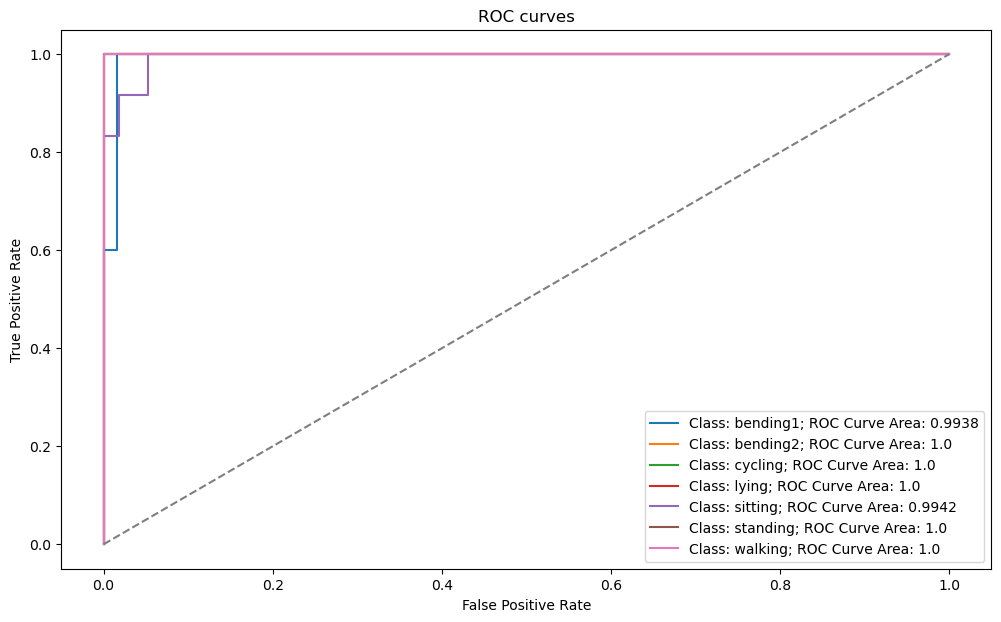

ROC Curve for Test Data


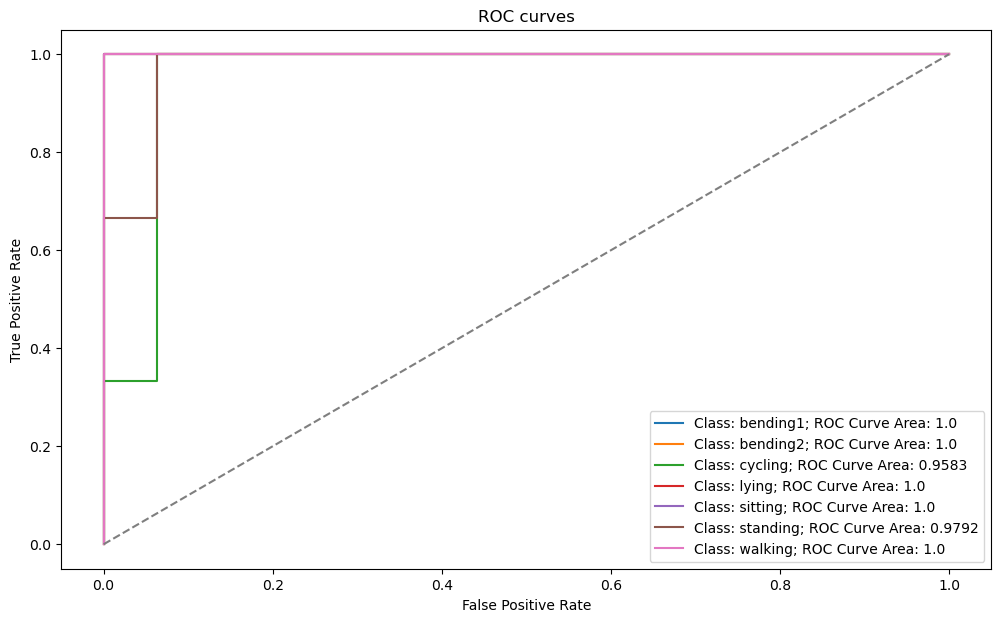

In [280]:
# making use of the varargs concept
kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100, 
    'multi_class' : 'multinomial',
    'solver' : 'saga'
}

fold_count = 5
best_l = optimal_L

# performing regression with the given classifier for the best value of L calculated from the above cell
perform_regression_with_classifier(LogisticRegression, 
                                   "Logistic Regression",
                                   best_l, 
                                   kwargs, 
                                   penalty='none',
                                   is_binary_classification=False, 
                                   draw_roc=True)

(ii) Repeat (c)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

In [281]:
kwargs = {
    
}

fold_count = 5
global max_test_accuracy
max_test_accuracy = 0

global optimal_L
optimal_L = 1

# performing regression for each value of L for 20 iterations
for l_val in range(1, 21):
    perform_regression_with_classifier(GaussianNB, 
                                       "Naive Bayes Classifier with Gaussian Prior",
                                       l_val, 
                                       kwargs, 
                                       penalty='none',
                                       is_binary_classification=False, 
                                       draw_roc=False)

Running Naive Bayes Classifier with Gaussian Prior for l-value 1
Value of L: 1 | train_score: 1.0 | test_score: 0.8947
Value of L: 1 | train_error: 0.0 | test_error: 0.1053

Running Naive Bayes Classifier with Gaussian Prior for l-value 2
Value of L: 2 | train_score: 1.0 | test_score: 0.6316
Value of L: 2 | train_error: 0.0 | test_error: 0.3684

Running Naive Bayes Classifier with Gaussian Prior for l-value 3
Value of L: 3 | train_score: 0.9855 | test_score: 0.7368
Value of L: 3 | train_error: 0.0145 | test_error: 0.2632

Running Naive Bayes Classifier with Gaussian Prior for l-value 4
Value of L: 4 | train_score: 1.0 | test_score: 0.7895
Value of L: 4 | train_error: 0.0 | test_error: 0.2105

Running Naive Bayes Classifier with Gaussian Prior for l-value 5
Value of L: 5 | train_score: 0.9855 | test_score: 0.7895
Value of L: 5 | train_error: 0.0145 | test_error: 0.2105

Running Naive Bayes Classifier with Gaussian Prior for l-value 6
Value of L: 6 | train_score: 0.971 | test_score: 0.63

Running Naive Bayes Classifier with Gaussian Prior for l-value 1
Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


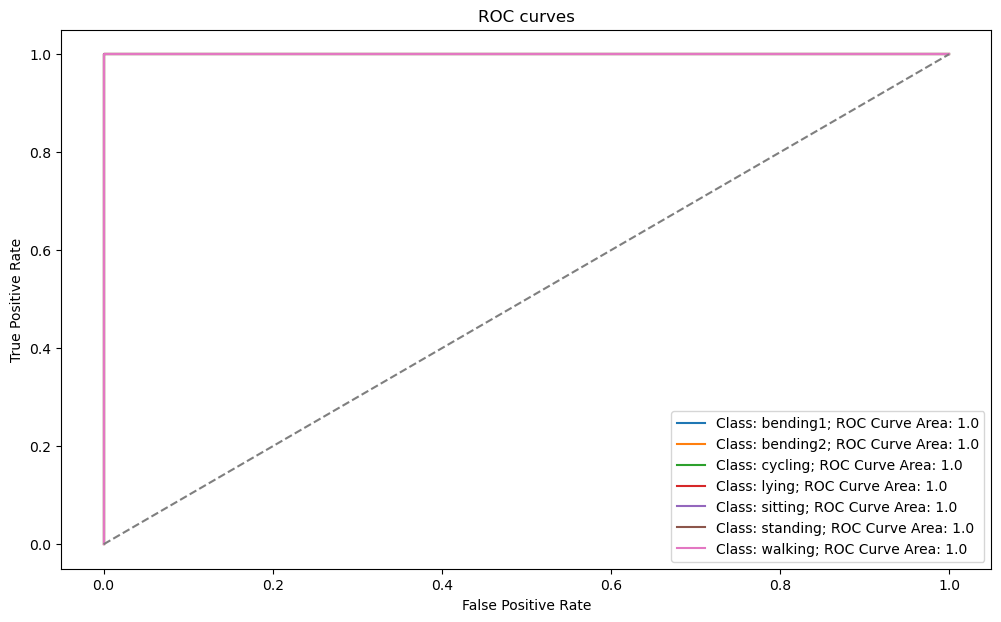

ROC Curve for Test Data


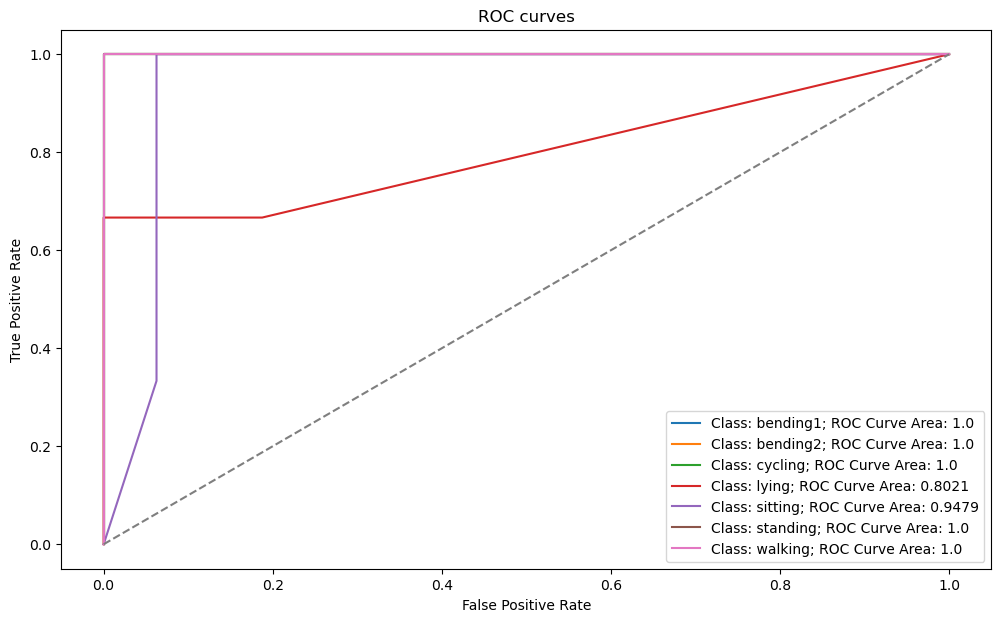

In [282]:
kwargs = {
    
}

fold_count = 5
best_l = optimal_L

# performing regression with the given classifier for the best value of L calculated from the above cell
perform_regression_with_classifier(GaussianNB, 
                                   "Naive Bayes Classifier with Gaussian Prior",
                                   best_l, 
                                   kwargs, 
                                   penalty='none',
                                   is_binary_classification=False, 
                                   draw_roc=True)

In [283]:
kwargs = {
    
}

fold_count = 5
global max_test_accuracy
max_test_accuracy = 0

global optimal_L
optimal_L = 1

# performing regression for each value of L for 20 iterations
for l_val in range(1, 21):
    perform_regression_with_classifier(MultinomialNB, 
                                       "Naive Bayes Classifier with Multinomial Prior",
                                       l_val, 
                                       kwargs, 
                                       penalty='none',
                                       is_binary_classification=False, 
                                       draw_roc=False)

Running Naive Bayes Classifier with Multinomial Prior for l-value 1
Value of L: 1 | train_score: 0.9275 | test_score: 0.8947
Value of L: 1 | train_error: 0.0725 | test_error: 0.1053

Running Naive Bayes Classifier with Multinomial Prior for l-value 2
Value of L: 2 | train_score: 0.8841 | test_score: 0.7368
Value of L: 2 | train_error: 0.1159 | test_error: 0.2632

Running Naive Bayes Classifier with Multinomial Prior for l-value 3
Value of L: 3 | train_score: 0.8986 | test_score: 0.7895
Value of L: 3 | train_error: 0.1014 | test_error: 0.2105

Running Naive Bayes Classifier with Multinomial Prior for l-value 4
Value of L: 4 | train_score: 0.913 | test_score: 0.7895
Value of L: 4 | train_error: 0.087 | test_error: 0.2105

Running Naive Bayes Classifier with Multinomial Prior for l-value 5
Value of L: 5 | train_score: 0.9275 | test_score: 0.7368
Value of L: 5 | train_error: 0.0725 | test_error: 0.2632

Running Naive Bayes Classifier with Multinomial Prior for l-value 6
Value of L: 6 | tra

Running Naive Bayes Classifier with Multinomial Prior for l-value 1
Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


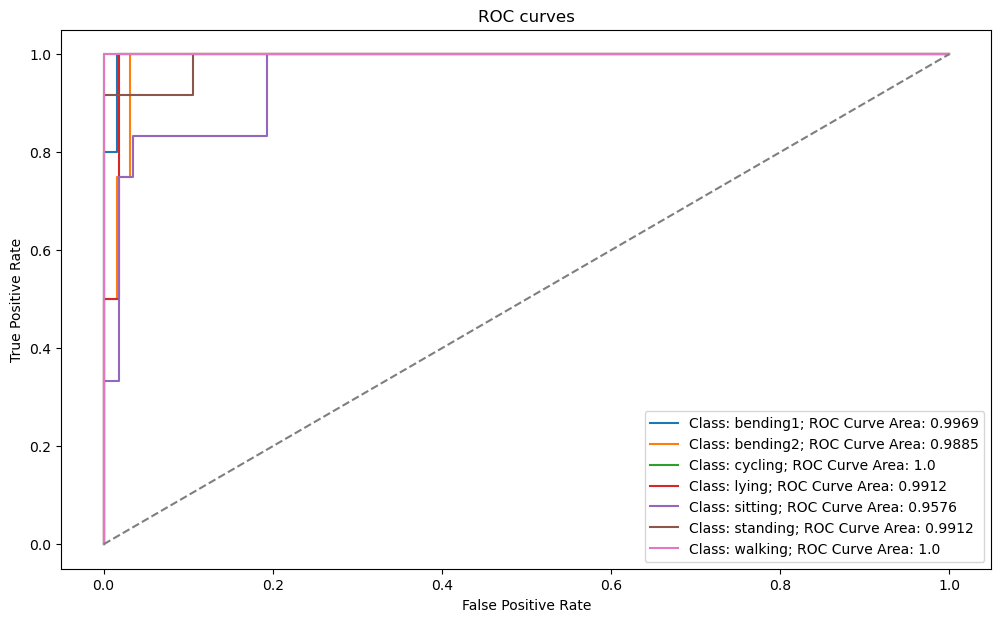

ROC Curve for Test Data


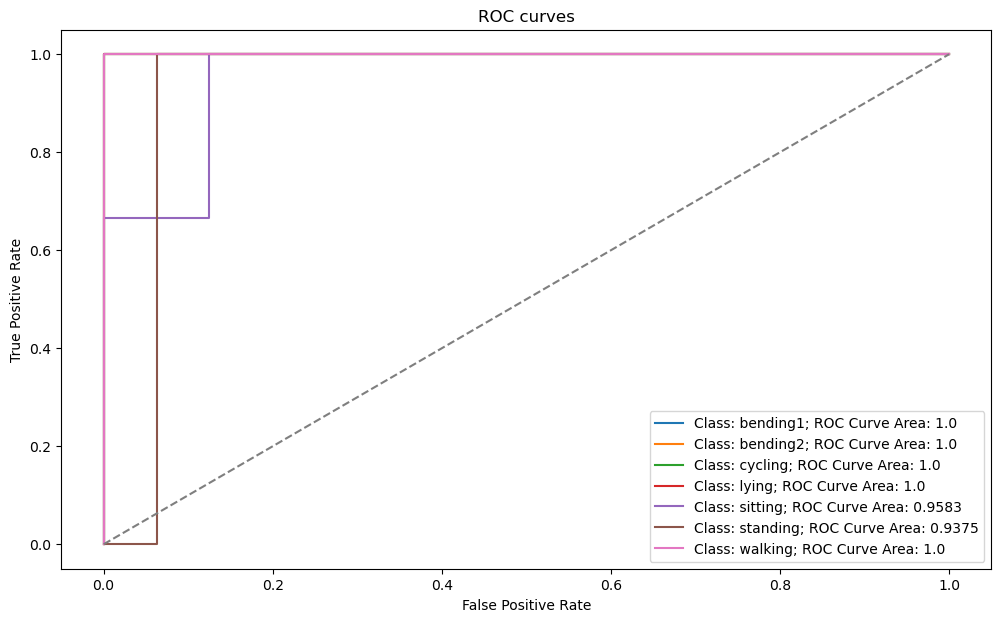

In [284]:
kwargs = {
    
}

fold_count = 5
best_l = optimal_L

# performing regression with the given classifier for the best value of L calculated from the above cell
perform_regression_with_classifier(MultinomialNB, 
                                   "Naive Bayes Classifier with Multinomial Prior",
                                   best_l, 
                                   kwargs, 
                                   penalty='none',
                                   is_binary_classification=False, 
                                   draw_roc=True)

## PCA

In [287]:
# utility  method for performing regression based on the given classifier
def usingPCA(classifier, classifier_name,l_val, pca_num, kwargs, 
                              is_binary_classification=True):
    print(f'Running {classifier_name} for l-value {l_val} with pca = {pca_num}')
    features = selected_features
    train_set = load_data(train, features, OG_COLUMN_NAMES, segs=l_val)
    test_set = load_data(test, features, OG_COLUMN_NAMES, segs=l_val)
    
    if is_binary_classification:
        train_set = get_binary_labelled_dataframe(pd.DataFrame(train_set))
        test_set = get_binary_labelled_dataframe(pd.DataFrame(test_set))
        
    trainX, trainY = get_data_X_Y(train_set)
    testX, testY = get_data_X_Y(test_set)
    
    if is_binary_classification:
        # https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown
        trainY = trainY.astype('int')
        testY = testY.astype('int')

    pca = PCA(n_components=pca_num, svd_solver='full')
    pca.fit(trainX)
    trainX = pca.fit_transform(trainX)
    testX = pca.fit_transform(testX)

    classifier2 = classifier(**kwargs)
    classifier2.fit(trainX, trainY)

    # plt.scatter(trainY,classifier2.fit(trainX, trainY).predict(trainX))
    # plt.xlabel = 'true'
    # plt.ylabel = 'predict'
    # plt.show()

    fig, ax = plt.subplots()

    ax.scatter(trainY,classifier2.fit(trainX, trainY).predict(trainX))
    ax.set_ylabel('predict')
    ax.set_xlabel('true')

    plt.show()

    train_score = round(classifier2.score(trainX, trainY), 4)
    test_score = round(classifier2.score(testX, testY), 4)
    print(f'Value of L: {l_val} | train_score: {train_score} | test_score: {test_score}')
    print(f'Value of L: {l_val} | train_error: {round((1 - train_score), 4)} | test_error: {round((1 - test_score), 4)}\n')
    global max_test_accuracy
    global optimal_L
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        optimal_L = l_val

    #ROC  
    train_predictY_prob = classifier2.predict_proba(trainX)
    test_predictY_prob = classifier2.predict_proba(testX)

    predictY = classifier2.predict(testX)
    cm = confusion_matrix(testY, predictY)
    print(f"Confusion matrix for test data:\n{cm}")
    
    print("ROC Curve for Train Data")
    plot_roc_curve(trainY, train_predictY_prob, classifier2)
    
    print("ROC Curve for Test Data")
    plot_roc_curve(testY, test_predictY_prob, classifier2)

Running Naive Bayes Classifier with Gaussian Prior for l-value 1 with pca = 1


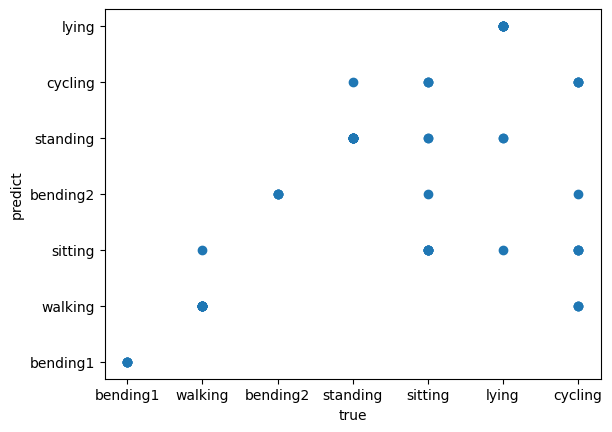

0     bending1
1     bending1
2     bending1
3     bending1
4     bending1
        ...   
64     cycling
65     cycling
66     cycling
67     cycling
68     cycling
Name: label, Length: 69, dtype: object
Value of L: 1 | train_score: 0.7246 | test_score: 0.5263
Value of L: 1 | train_error: 0.2754 | test_error: 0.4737

Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [1 0 0 0 0 0 1]
 [0 0 1 0 0 0 2]
 [0 0 0 3 0 0 0]
 [0 0 0 0 0 2 1]
 [0 0 0 1 0 2 0]
 [0 0 0 0 1 0 2]]
ROC Curve for Train Data


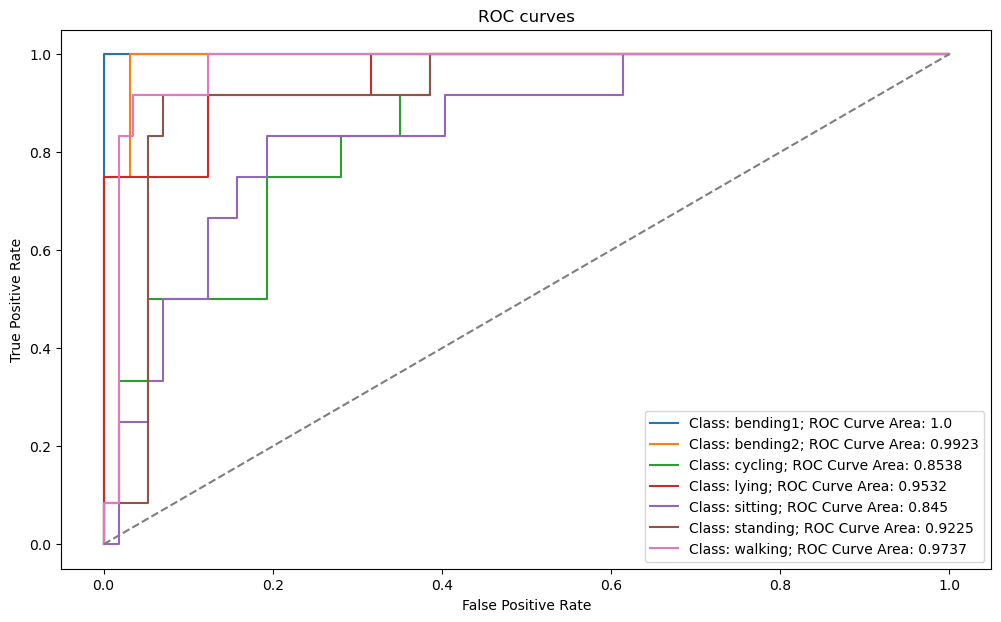

ROC Curve for Test Data


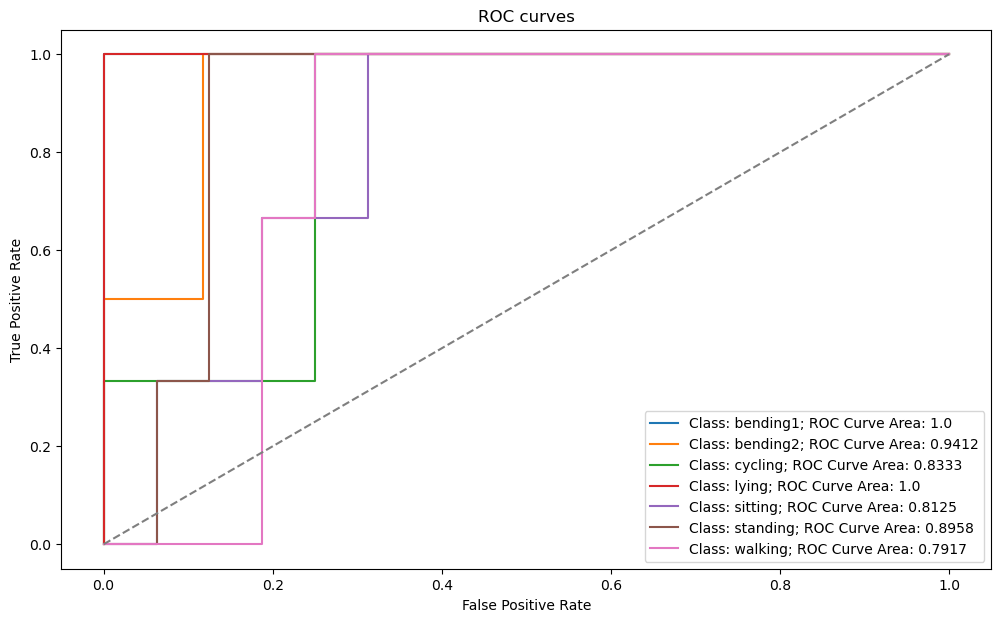

Running Naive Bayes Classifier with Gaussian Prior for l-value 1 with pca = 2


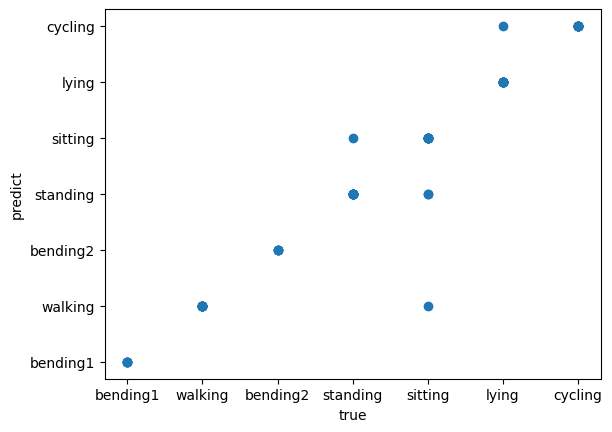

0     bending1
1     bending1
2     bending1
3     bending1
4     bending1
        ...   
64     cycling
65     cycling
66     cycling
67     cycling
68     cycling
Name: label, Length: 69, dtype: object
Value of L: 1 | train_score: 0.9275 | test_score: 0.6842
Value of L: 1 | train_error: 0.0725 | test_error: 0.3158

Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [0 1 0 1 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 1 0 0 0 2]]
ROC Curve for Train Data


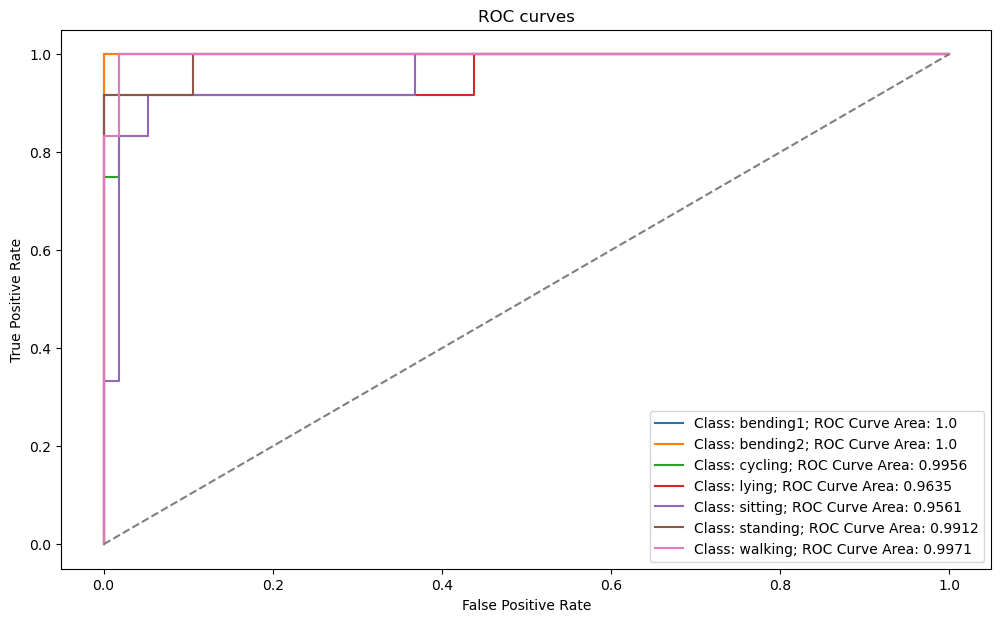

ROC Curve for Test Data


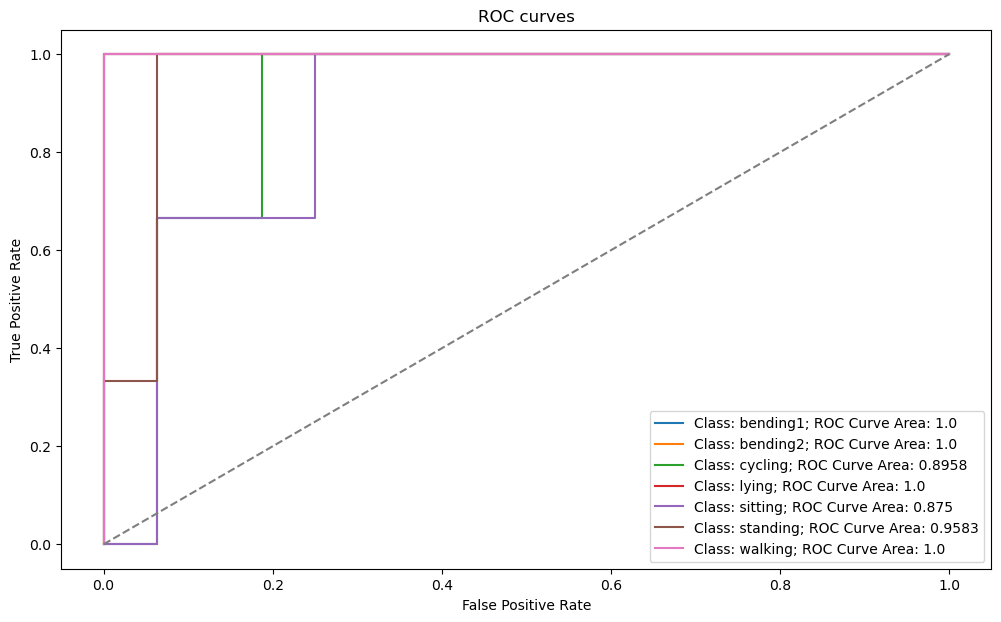

In [288]:
kwargs = {
    
}
    
fold_count = 5
best_l = optimal_L

for i in range(1,3):
    usingPCA(GaussianNB, 
            "Naive Bayes Classifier with Gaussian Prior",
            best_l, 
            i,
            kwargs, 
            is_binary_classification=False)

**Observation:**
> It looks like Logistic Regression is the better method for the multi-class classification in this problem.